In [2]:
%load_ext autoreload
%autoreload 2

import glob
import os
import pynwb
import graph
from tqdm import tqdm
from pathlib import Path 

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LassoCV
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import matplotlib
import matplotlib.pyplot as plt
# from matplotlib_venn import venn2
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
sz1 = 16
sz2 = 18
sns.set(style="ticks", rc={"lines.linewidth": 1.5})
matplotlib.rc('xtick', labelsize=sz1) 
matplotlib.rc('ytick', labelsize=sz1) 
matplotlib.rc('axes', labelsize=sz1)  
matplotlib.rc('axes', titlesize=sz1)  
matplotlib.rc('figure', titlesize=sz2)
matplotlib.rc('legend', fontsize=sz1) 
matplotlib.rc('legend', title_fontsize=sz1)
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

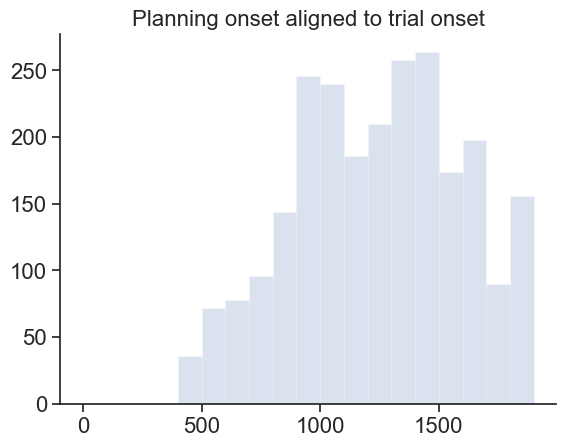

In [232]:
plt.close('all')
plt.hist(fix_df.query('planning').start_time-fix_df.query('planning').trial_start_time,bins=np.arange(0,2000,100),alpha=0.2)
# plt.hist(trial_df['interval1'].values,bins=np.arange(0,2000,100),alpha=0.2,density=True)
plt.title('Planning onset aligned to trial onset')
plt.savefig('Planning onset aligned to trial onset')

In [186]:
os.chdir(DATA_DIR)
filenames = glob.glob('*.nwb') # sorted()
    
trial_df = pd.DataFrame()
fix_df = pd.DataFrame()
choice_df = pd.DataFrame()
node_df = pd.DataFrame()

spikes = [[] for i in range(len(filenames))]
neuron_df = pd.DataFrame()

for ii, filename in enumerate(filenames):

    print(filename)     
    trial_df = pd.concat([trial_df, nwbfile.trials.to_dataframe().query('trialerror<2')])
    fix_df = pd.concat([fix_df,nwbfile.intervals["fixations"].to_dataframe().query("duration >= 50").query('trialerror<2')])
    choice_df = pd.concat([choice_df,nwbfile.intervals["action_on"].to_dataframe().query('trialerror<2')])
    node_df = pd.concat([node_df,nwbfile.intervals["node_on"].to_dataframe().query('trialerror<2')])

trial_df['interval1'] = node_df.query('step==0').t_on.values-trial_df.start_time.values
choice_df['interval2'] = choice_df.t_on.values-node_df.t_on.values
fix_df['planning'] = (fix_df.duration<300) & (fix_df.active_prob<0.2)
fix_df['choice'] = (fix_df.duration>300) & (fix_df.active_prob>0.2)

Bart_TeleWorld_v13_031723.nwb
Bart_TeleWorld_v13_032823.nwb
Bart_TeleWorld_v13_033123.nwb
Bart_TeleWorld_v13_032023.nwb
Bart_TeleWorld_v13_040423.nwb
Bart_TeleWorld_v13_040723.nwb


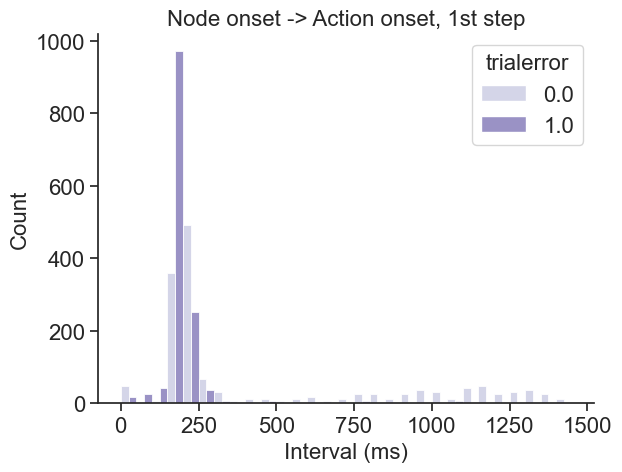

In [208]:
plt.close('all')
sns.histplot(data=choice_df.query('(step==0) & (blocktrialnumber<6)'),x='interval2',hue='trialerror',
            palette=sns.color_palette('Purples',2),multiple='dodge',bins=np.arange(0,1500,50))
# sns.ecdfplot(data=choice_df.query('(step==0) & (blocktrialnumber<6)'),x='interval2',hue='blocktrialnumber',
#             palette=sns.color_palette('Purples',5))
plt.title('Node onset -> Action onset, 1st step')
plt.xlabel('Interval (ms)')
plt.savefig('Node onset to Action onset, 1st step, histogram')

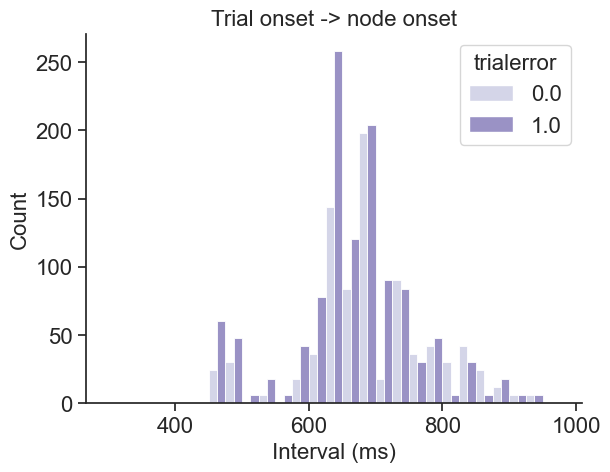

In [204]:
plt.close('all')
sns.histplot(data=trial_df.query('blocktrialnumber<5'),x='interval1',hue='trialerror',palette=sns.color_palette('Purples',2),
            multiple='dodge',bins=np.arange(300,1000,25))
# sns.ecdfplot(data=trial_df.query('blocktrialnumber<5'),x='interval1',hue='trialerror',palette=sns.color_palette('Purples',2))
plt.title('Trial onset -> node onset')
plt.xlabel('Interval (ms)')
plt.savefig('Trial onset to node onset, histogram')

In [26]:
fix_df, fix_spikes, _ = combine_data(DATA_DIR,"HPC","fixations","trialerror == 0")

Bart_TeleWorld_v13_031723.nwb


python(71643) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
492it [00:04, 118.52it/s]


Bart_TeleWorld_v13_032823.nwb


553it [00:06, 85.35it/s] 


Bart_TeleWorld_v13_033123.nwb


608it [00:07, 85.47it/s] 


Bart_TeleWorld_v13_032023.nwb


712it [00:05, 125.34it/s]


Bart_TeleWorld_v13_040423.nwb


702it [00:08, 83.59it/s] 


Bart_TeleWorld_v13_040723.nwb


596it [00:04, 124.13it/s]


In [30]:
planning = fix_df.query('planning')

In [38]:
filename = "Bart_TeleWorld_v13_032823.nwb"  # Replace with your NWB file path
nwbfile = pynwb.NWBHDF5IO(filename, "r").read() 
trial_df = nwbfile.trials.to_dataframe()

In [54]:
import matplotlib.gridspec as gridspec

In [132]:
for _, fix in fixations_during_trial.iterrows():
    print(fix)

start_time                                                    79972.0
stop_time                                                     80256.0
trial_start_time                                              79123.0
trial_stop_time                                               82003.0
trial                                                              13
trialerror                                                        0.0
nsteps                                                            1.0
start                                                             9.0
target                                                            8.0
block                                                             2.0
blocktrialnumber                                                  7.0
nodes                                                             9,8
t_on                                                            79972
t_off                                                           80256
duration            

In [134]:
trial_df[trial_df.trial==trial]

,start_time,stop_time,trial,trialerror,nsteps,start,target,block,blocktrialnumber,nodes,timeseries
id,,,,,,,,,,,
13,79123.0,82003.0,13,0.0,1.0,9.0,8.0,2.0,7.0,"9,8","[(79123, 2880, neural pynwb.base.TimeSeries at..."


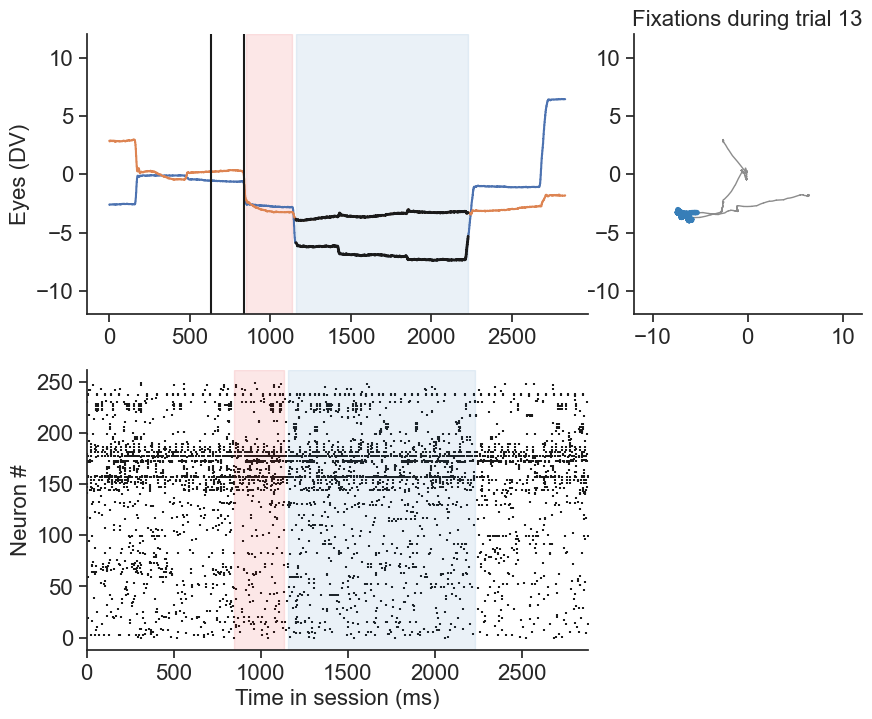

In [130]:
# train decoder on choice fixations

# get spikes between trial onset to 1st action onset 

# trial = 13
# eye_idx = 2
# neural_idx = 0

# pull trial for a single trial
# plot eye trace in 4*4 grid
eyes = trial_df[trial_df.trial==trial].timeseries.iloc[0][eye_idx]
spikes = trial_df[trial_df.trial==trial].timeseries.iloc[0][neural_idx]
trial_on = trial_df[trial_df.trial==trial].start_time.values[0]

fixations_during_trial = nwbfile.intervals["fixations"].to_dataframe().query("(trial == @ trial) & (duration >= 50)")
fixations_during_trial['planning'] = (fixations_during_trial.duration<300) & (fixations_during_trial.active_prob<0.2)
fixations_during_trial['choice'] = (fixations_during_trial.duration>300) & (fixations_during_trial.active_prob>0.2)

node_df = nwbfile.intervals["node_on"].to_dataframe().query("(trial == @ trial) & (step==0)")
node_on = node_df.t_on.values[0]-trial_on
action_df = nwbfile.intervals["action_on"].to_dataframe().query("(trial == @ trial) & (step==0)")
action_on = action_df.t_on.values[0]-trial_on


color_seq = sns.color_palette('Set1',len(fixations_during_trial))

plt.close('all')
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(nrows=2, ncols=3)
ax=fig.add_subplot(gs[0,2])
ax.plot(eyes.data[:, 0], eyes.data[:, 1], alpha=0.5, c="k", lw=1)

ii=0
for _, fix in fixations_during_trial.iterrows():

    if ii<3:
    
        idx = (eyes.timestamps >= (fix.start_time)) & (eyes.timestamps <= fix.stop_time)
        fixation_trace = eyes.data[idx, :]
        if fix.planning:
            ax.plot(fixation_trace[:, 0], fixation_trace[:, 1], c=color_seq[ii], lw=2)
        if fix.choice:
            ax.plot(fixation_trace[:, 0], fixation_trace[:, 1], c=color_seq[ii], lw=4)

    ii=ii+1


ax.set_ylim([-12, 12])
ax.set_xlim([-12, 12])
ax.set_title("Fixations during trial %i" % trial)

# sns.despine(bottom=False,left=False)


# plot eyetracking data separately for x, y, for alignment with neural data visualization
ax = fig.add_subplot(gs[0,:2])
ax.plot(eyes.timestamps-trial_on, eyes.data)
ax.axvline(node_on,color='k')
ax.axvline(action_on,color='k')
ii=0
for _, fix in fixations_during_trial.iterrows():

    if ii<3:
        
        ax.axvspan(fix.start_time-trial_on, fix.stop_time-trial_on, color=color_seq[ii], alpha=0.1)
        idx = (eyes.timestamps >= (fix.start_time)) & (eyes.timestamps <= fix.stop_time)
        fixation_trace = eyes.data[idx, :]
        
        if fix.choice:
            ax.plot(eyes.timestamps[idx]-trial_on,fixation_trace, c='k', lw=2)

    ii=ii+1

ax.set_ylabel("Eyes (DV)")
ax.set_ylim([-12, 12])

# plot spike raster
ax = fig.add_subplot(gs[1,:2])
X, Y = np.where(spikes.data)
X = (X + spikes.timestamps[0]-trial_on)
ax.scatter(X, Y, marker = "|", c="k", s=1)

ii=0
for _, fix in fixations_during_trial.iterrows():

    if ii<3:
        
        ax.axvspan(fix.start_time-trial_on, fix.stop_time-trial_on, color=color_seq[ii], alpha=0.1)

    ii=ii+1
    
ax.set_xlim(spikes.timestamps[0]-trial_on, spikes.timestamps[-1]-trial_on)
ax.set_ylabel("Neuron #")
ax.set_xlabel("Time in session (ms)")
sns.despine()


In [36]:
planning[planning.Session=='031723'].groupby('trial').count()

,Session,start_time,stop_time,trial_start_time,trial_stop_time,trialerror,nsteps,start,target,block,...,node_off,fix_node,entropy_ratio,t_middle,window_size,timeseries,planning,choice,use_tele,node
trial,,,,,,,,,,,,,,,,,,,,,
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
11,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
970,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
986,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [20]:
from my_utils import get_spike_table
from my_utils import combine_data

In [24]:
DATA_DIR = Path('/Volumes/Extreme SSD')
FIG_DIR = Path('/Users/lianghexin/Documents/Berkeley/Teleworld/Figures')

In [ ]:
neuron_df_first = pd.read_hdf("/Volumes/Extreme SSD/SingleNeurons_first.h5", key="data")
neuron_df_all = pd.read_hdf("/Volumes/Extreme SSD/SingleNeurons_all.h5", key="data")

In [ ]:
pd.read_hdf("/Volumes/Extreme SSD/SingleNeurons_all_first.h5", key="data")


In [ ]:
# def get_node_tuning():
spatial_pval = np.vstack(neuron_df['spatial_pval'])
tmax = np.argmax(np.mean(spatial_pval<0.05,axis=0))
ref_node_first = np.vstack(neuron_df['reg_ref_node'])[:,tmax]
diff_node_first = np.vstack(neuron_df['sig_diff_node'])[:,tmax]
idx = neuron_df['spatial'].values

In [ ]:
df['spatial_first']= neuron_df['spatial'].values
df['ref_node_first'] = np.vstack(neuron_df['reg_ref_node'])[:,tmax]
df['diff_node_first'] = np.vstack(neuron_df['sig_diff_node'])[:,tmax]

In [ ]:
var1='spatial_first'
var2='spatial_all'
AB = np.sum(df[var1].values & df[var2].values)
venn2(subsets=(np.sum(df[var1].values)-AB, np.sum(df[var2].values)-AB, AB), set_labels=('1st step','all steps'))
plt.title("Two-Set Venn Diagram")
plt.show()

In [ ]:
both = df.query("spatial_all & spatial_first")
np.sum([both.ref_node_all==both.ref_node_first])

In [ ]:
plt.close('all')
plt.hist(ref_node[idx],bins=np.arange(-0.5,17))

In [ ]:
plt.close('all')
plt.hist(ref_node[idx],bins=np.arange(-0.5,17))

In [ ]:
plt.close('all')
plt.figure(figsize=(6,4.5))

# Define the bin edges
bins = np.arange(-0.5, 17)

# Get the counts for each group
vals1 = df.query('spatial_all').ref_node_all.values
vals2 = df.query('spatial_first').ref_node_first.values

counts1, edges = np.histogram(vals1, bins=bins)
counts2, _      = np.histogram(vals2, bins=bins)

# Bin centers for x positions
bin_centers = (edges[:-1] + edges[1:]) / 2

# Combine into long-form DataFrame
data = pd.DataFrame({
    'bin': np.tile(bin_centers.astype(int), 2),
    'count': np.concatenate([counts1, counts2]),
    'group': ['all steps']*len(counts1) + ['first step']*len(counts2)
})

# Plot side-by-side bars
sns.barplot(
    data=data,
    x='bin',
    y='count',
    hue='group',
    dodge=True
)
plt.xlabel('Favorite node')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
plt.close('all')
plt.hist(df.query('spatial_all').diff_node_all.values,bins=np.arange(-0.5,16))
plt.hist(df.query('spatial_first').diff_node_first.values,bins=np.arange(-0.5,16))

plt.ylabel('Counts')
plt.xlabel('Number of nodes significantly different')
plt.title('All steps')

In [ ]:
# def get_node_tuning():
spatial_pval = np.vstack(neuron_df['spatial_pval'])
tmax = np.argmax(np.mean(spatial_pval<0.05,axis=0))
ref_node_all = np.vstack(neuron_df['reg_ref_node'])[:,tmax]
diff_node_all = np.vstack(neuron_df['sig_diff_node'])[:,tmax]
idx = neuron_df['spatial'].values

In [279]:
choice_df, choice_spikes, neuron_df = combine_data(DATA_DIR,"HPC","action_on","(trialerror == 0)")
choice_df['distance'] = choice_df['graph_distance']
choice_df.loc[choice_df.distance>3,'distance'] = 4
coef, pval, p_node, ref_node_all = node_regression(choice_df, choice_spikes, neuron_df)

0 031723


100%|███████████████████████████████████████████| 80/80 [00:13<00:00,  5.93it/s]


1 032823


100%|███████████████████████████████████████████| 94/94 [00:22<00:00,  4.26it/s]


2 033123


100%|███████████████████████████████████████████| 88/88 [00:33<00:00,  2.59it/s]


3 032023


100%|███████████████████████████████████████████| 73/73 [00:19<00:00,  3.81it/s]


4 040423


100%|███████████████████████████████████████████| 88/88 [00:32<00:00,  2.67it/s]


5 040723


100%|███████████████████████████████████████████| 60/60 [00:13<00:00,  4.43it/s]


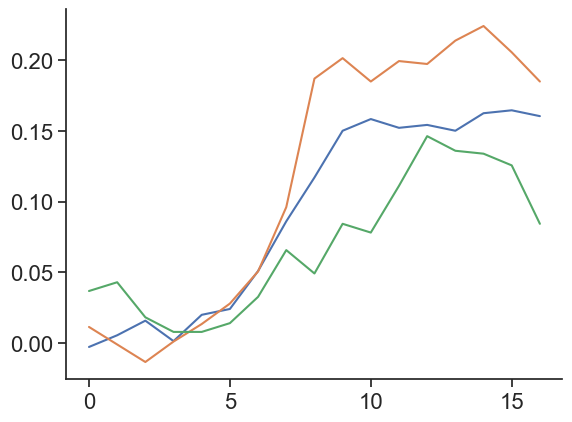

In [403]:
plt.close('all')
plt.plot(np.mean(p_node<0.05,axis=0)-0.15)
plt.plot(np.mean(fix_p_node<0.05,axis=0)-0.2)
plt.plot(np.mean(plan_p_node<0.05,axis=0)-0.1)

In [369]:
fix_coef, fix_pval, fix_p_node, fix_ref_node_all = node_regression(fix_df, fix_spikes, neuron_df)

0 031723


100%|███████████████████████████████████████████| 80/80 [00:21<00:00,  3.73it/s]


1 032823


100%|███████████████████████████████████████████| 94/94 [01:06<00:00,  1.41it/s]


2 033123


100%|███████████████████████████████████████████| 88/88 [01:18<00:00,  1.11it/s]


3 032023


100%|███████████████████████████████████████████| 73/73 [00:46<00:00,  1.58it/s]


4 040423


100%|███████████████████████████████████████████| 88/88 [01:22<00:00,  1.07it/s]


5 040723


100%|███████████████████████████████████████████| 60/60 [00:51<00:00,  1.18it/s]


In [387]:
plan_coef, plan_pval, plan_p_node, plan_ref_node_all = node_regression(fix_df, fix_spikes, neuron_df,planning=1)

0 031723


100%|███████████████████████████████████████████| 80/80 [00:08<00:00,  9.33it/s]


1 032823


100%|███████████████████████████████████████████| 94/94 [00:15<00:00,  6.00it/s]


2 033123


100%|███████████████████████████████████████████| 88/88 [00:21<00:00,  4.06it/s]


3 032023


100%|███████████████████████████████████████████| 73/73 [00:09<00:00,  7.57it/s]


4 040423


100%|███████████████████████████████████████████| 88/88 [00:16<00:00,  5.29it/s]


5 040723


100%|███████████████████████████████████████████| 60/60 [00:11<00:00,  5.44it/s]


In [263]:
fix_df, fix_spikes, neuron_df = combine_data(DATA_DIR,"HPC","fixations","trialerror == 0")
# choice_df['distance'] = choice_df['graph_distance']
fix_df.loc[fix_df.distance>3,'distance'] = 4
# choice_df['alltarget'] = np.isin(choice_df['node'].values,[1,7,8,14])
# choice_df['istarget'] = choice_df['node']==choice_df['target']

Bart_TeleWorld_v13_031723.nwb


492it [00:03, 136.18it/s]


Bart_TeleWorld_v13_032823.nwb


553it [00:04, 123.38it/s]


Bart_TeleWorld_v13_033123.nwb


608it [00:04, 135.93it/s]


Bart_TeleWorld_v13_032023.nwb


712it [00:04, 152.21it/s]


Bart_TeleWorld_v13_040423.nwb


702it [00:08, 84.88it/s] 


Bart_TeleWorld_v13_040723.nwb


596it [00:04, 128.54it/s]


In [385]:
def node_regression(df, spikes, neuron_df,planning=0):

# regression analysis with partial F-test, DON'T CHANGE THIS!!!
# model 2, use node with maximum FR as a reference
# regressors to build: 1) distance/value, 
#                      2) node as one hop vector, 

    pval=[]
    coef=[]
    p_node=[]
    ref_node_all=[]
    
    timestamps = np.arange(100,950,50)
    ws = 100
    
    # ['031723','032823','033123','032023','040423','040723']
    
    for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']):
    
        print(ss,date)
    
        unitNames = neuron_df.query("Session==@date").unitNumber.values
        ses = df.query("Session==@date")
        FR = spikes[ss]

        if planning:
            idx = ses.planning.values
            ses = ses.loc[idx]
            FR = FR[idx,:]
    
        # idx = ses.node!=ses.target
        
        one_hot_node = to_one_hot(ses['node'].values)
        
        coef_temp = np.ones((FR.shape[2],len(timestamps),one_hot_node.shape[1]+1))*np.nan
        pval_temp = np.ones((FR.shape[2],len(timestamps),one_hot_node.shape[1]+1))*np.nan
        p_node_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
        proportion_node_temp = np.zeros((FR.shape[2],len(timestamps)))
        ref_node_temp = np.ones((FR.shape[2],len(timestamps)))
    
        
        for nn in tqdm(range(FR.shape[2])):
                    
            for ii, tt in enumerate(timestamps):
            
                # Fit the model
                y = FR[:,tt-ws:tt+ws,nn].sum(axis=1).reshape(-1,1)
    
                # use node with maximum FR as a reference
                lambda_i = np.array([y[ses.node.values == g].mean() 
                          for g in range(16)])*1000
                ref_node = np.argmax(lambda_i)
    
                # model 2, choose a reference node, k-1 dummy variables
                X = np.concatenate([ses['distance'].values.reshape(-1,1),np.delete(one_hot_node,ref_node,axis=1)], axis=1)
                X = add_constant(X)
            
                not_nan = ~np.isnan(y).ravel() # check why there is nan
                
                model = sm.OLS(y[not_nan],X[not_nan,:])
                res = model.fit()
                
                coef_temp[nn,ii,:] = res.params
                pval_temp[nn,ii,:] = res.pvalues
                ref_node_temp[nn,ii] = ref_node           
                
                cpd = partial_r2_and_f(X[not_nan,:], X[not_nan,:][:,np.array([0,1])], y[not_nan])
                p_node_temp[nn,ii] = cpd['pval_f']
    
    
    ######## should account for multiple fav states
        
    
        coef.append(coef_temp)
        pval.append(pval_temp)
        p_node.append(p_node_temp)
        ref_node_all.append(ref_node_temp)
        
    coef = np.concatenate(coef)
    pval = np.concatenate(pval)
    p_node = np.concatenate(p_node)
    ref_node_all = np.concatenate(ref_node_all)
    
    pval=pval[:,:,np.mean(~np.isnan(pval),axis=(0,1))>0]
    proportion = np.mean(pval<0.05,axis=0)
    proportion_node = np.mean(p_node<0.05,axis=0)

    return coef, pval, p_node, ref_node_all

In [87]:
# test if a neuron encodes generic value, not target specific
# leave one target out regression

timestamps=np.arange(100,950,50)
pval=[]
# ['031723','032823','033123','032023','040423','040723']

for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']):

    print(ss,date)

    unitNames = neuron_df.query("Session==@date").unitNumber.values
    ses = choice_df.query("Session==@date")
    FR = choice_spikes[ss]
    X = add_constant(ses.distance.values)

    pval_temp = np.ones((FR.shape[2],len(timestamps),4))*np.nan
    
    for nn,unitNumber in tqdm(enumerate(unitNames)):

        for ii, tt in enumerate(timestamps):
        
            y = FR[:,tt-100:tt+100,nn].sum(axis=1).reshape(-1,1)
        
            for jj, target in enumerate([1,7,8,14]):
        
                idx = ses.target.values==target
        
                model = sm.OLS(y[~idx,:],X[~idx,:])
                res = model.fit()
        
                pval_temp[nn,ii,jj] = cv_ftest(res, X[idx,:], y[idx,:])
                
    pval.append(pval_temp)

pval = np.concatenate(pval)

0 031723


80it [00:04, 17.15it/s]


1 032823


94it [00:05, 15.81it/s]


2 033123


88it [00:06, 13.59it/s]


3 032023


73it [00:05, 13.16it/s]


4 040423


88it [00:08, 10.69it/s]


5 040723


60it [00:04, 14.36it/s]


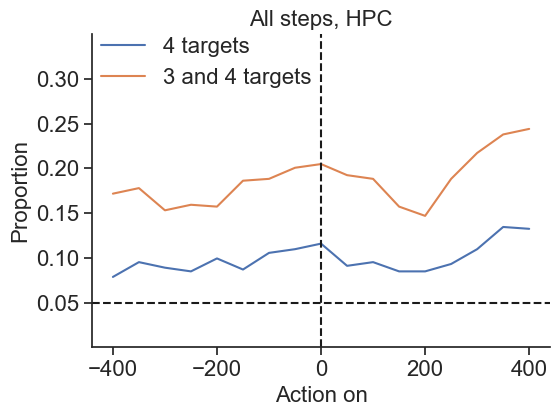

In [89]:
# visualize the porportion of neurons
plt.close('all')
proportion = np.mean(np.mean(pval<0.05,axis=2)==1,axis=0)
plt.plot(timestamps-500,proportion,label='4 targets')

proportion = np.mean(np.mean(pval<0.05,axis=2)>0.5,axis=0)
plt.plot(timestamps-500,proportion,label='3 and 4 targets')

plt.axvline(0,color='k',ls='--')
plt.axhline(0.05,color='k',ls='--')
plt.title('All steps, HPC')
plt.xlabel('Action on')
plt.ylabel('Proportion')
plt.ylim(0,0.35)
plt.yticks(np.arange(0.05,0.35,0.05))
plt.legend(loc=(0,0.8),frameon=False)
plt.tight_layout(rect=[0,0,0.9,0.9])
plt.savefig('Generic value neurons, all step, HPC')

In [53]:
def cv_ftest(res, X, y):
    
    y_pred = np.matmul(X,res.params)
    SSE = np.sum(np.square(y.ravel()-y_pred))
    SSR = np.sum(np.square(y.mean()-y_pred))
    df1 = X.shape[1]-1
    df2 = X.shape[0]-X.shape[1]
    fval = (SSR/df1) / (SSE/df2)
    pval = 1 - stats.f.cdf(fval, df1, df2)

    return pval

In [36]:
def plot_psth(spikes, df, condition, ax):

    uni_values = np.sort(df[condition].unique())
    t = np.arange(-500, 500)
    
    if condition=='distance':
        colors = sns.color_palette('Blues',len(uni_values))
    if condition=='action':
        colors = sns.color_palette("bright", len(uni_values)) 
    if condition=='target':
        colors = sns.color_palette("bright", len(uni_values)) 
        
    for ii, vv in enumerate(uni_values):
        
        idx = df[condition].values == vv
        trace = movmean(spikes[idx, :].mean(axis=0)*1000, w=75).flatten()
        
        if condition=='node':
            x,y=xy(vv,4,4)
            ax.plot(t, trace,color=cmap_2d[x,y],label = condition + '=' + str(vv))
        else:
            ax.plot(t, trace,color=colors[ii],label = condition + '=' + str(vv))
        
    ax.axvline(0, color='k', linestyle='--')


In [52]:
def create_balanced_datasets(df,FR,var1,trialNum=200):

    # here var1 is the variable of interest
    # var2 is the additional variable to be balanced
    
    bstrap_df = pd.DataFrame()
    bstrap_spikes = []
    
    for var1_ind,val1 in enumerate(np.unique(df[var1])):  

        condition_idx = df[var1]==val1
        temp_df = df.loc[condition_idx,:].reset_index(drop=True)  
        temp_FR = FR[condition_idx,:,:]

        if len(temp_df)>0:
            
            idx = np.random.randint(len(temp_df),size=trialNum)
            bstrap_df = pd.concat([bstrap_df,temp_df.loc[idx,:]])
            bstrap_spikes.append(temp_FR[idx,:,:])

    return bstrap_df, np.concatenate(bstrap_spikes)

In [46]:
df = ses.copy()
var1 = 'distance'

bstrap_df = pd.DataFrame()
bstrap_spikes = []

for var1_ind,val1 in enumerate(np.unique(df[var1])):  

    condition_idx = df[var1]==val1
    temp_df = df.loc[condition_idx,:].reset_index(drop=True)  
    temp_FR = FR[condition_idx,:,:]

    for var2_ind,val2 in enumerate(np.unique(df[var1])):  
            
    idx = np.random.randint(len(temp_df),size=trialNum)
    bstrap_df = pd.concat([bstrap_df,temp_df.loc[idx,:]])
    bstrap_spikes.append(temp_FR[idx,:,:])

NameError: name 'trialNum' is not defined

In [28]:
def get_design_matrices(ses,model):

    one_hot_node = to_one_hot(ses['node'].values)
    one_hot_action = to_one_hot(ses['action'].values)[:, 1:]
    one_hot_target = to_one_hot(ses['target'].values)[:,1:]

    # model 1
    if model==0:
        values = np.concatenate([ses['distance'].values.reshape(-1,1),
                         one_hot_node], axis=1)
        names =  {'distance':[0],
          'node':list(range(1,1+one_hot_node.shape[1]))}

    # model 2
    if model==1:
        values = np.concatenate([ses['distance'].values.reshape(-1,1),
                         np.ones(len(ses)).reshape(-1,1)], axis=1)
        names =  {'distance':[0],
          'constant':[1]}

    # Tried following models, not good 

    # # model 2
    # if model==1:
    #     values = np.concatenate([ses['distance'].values.reshape(-1,1),one_hot_node,one_hot_target], axis=1)
    #     names =  {'distance':[0],
    #               'node':list(range(1,1+one_hot_node.shape[1])),
    #               'target':list(range(1+one_hot_node.shape[1],
    #                           1+one_hot_node.shape[1]+one_hot_target.shape[1]))}
    
    # # model 2
    # if model==1:
    #     values = np.concatenate([ses['istarget'].values.reshape(-1,1),
    #                      one_hot_node], axis=1)
    #     names =  {'istarget':[0],
    #       'node':list(range(1,1+one_hot_node.shape[1]))}
        
    # # model 2
    # if model==1:
    #     values = np.concatenate([ses['distance'].values.reshape(-1,1),
    #                      one_hot_node, one_hot_action], axis=1)
    #     names = {'distance':[0],
    #       'node':list(range(1,1+one_hot_node.shape[1])),
    #       'action':list(range(1+one_hot_node.shape[1],
    #                           1+one_hot_node.shape[1]+one_hot_action.shape[1]))}


    # # model 3
    # if model==2:
    #     values = np.concatenate([ses['distance'].values.reshape(-1,1),
    #                      one_hot_node[:, ~np.isin(np.arange(16), [1,7,8,14])],
    #                      one_hot_action, ses['alltarget'].values.reshape(-1,1)], axis=1)
    #     names = {'distance':[0],
    #       'node':list(range(1, 1+one_hot_node.shape[1]-4)),  # removed 4 nodes
    #       'action':list(range(1+one_hot_node.shape[1]-4,
    #                           1+one_hot_node.shape[1]-4+one_hot_action.shape[1])),
    #       'alltarget':[1+one_hot_node.shape[1]-4+one_hot_action.shape[1]]}

    # # model 4
    # if model==3:
    #     values = np.concatenate([ses['distance'].values.reshape(-1,1),
    #                      one_hot_node[:, ~np.isin(np.arange(16), [1,7,8,14])],
    #                      ses['alltarget'].values.reshape(-1,1)], axis=1)
    #     names = {'distance':[0],
    #       'node':list(range(1, 1+one_hot_node.shape[1]-4)),  # removed 4 nodes
    #       'alltarget':[1+one_hot_node.shape[1]-4]}
    
    return values, names

    # model 1, including distance and node as one hop vector
    # X = np.concatenate([ses['distance'].values.reshape(-1,1),one_hop_node],axis=1)

    # model 2, only include distance, should do it separately for each target to see if it is generic value or target specific
    # X = add_constant(ses['distance'].values)

    # model 3, add target as a one hop vector, this might get collinear with distance??

    # model 4, including distance and node, except combining four targets into one, 
    
    # X = np.concatenate([ses['distance'].values.reshape(-1,1),one_hop_node,
    #                    NS,WE,tele_dir,tele],axis=1)
    

In [295]:
# 1. calculate the VIF

all_vifs = []

for mm in [1]:#range(2):

    for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']):
        
        print(ss, date)
        
        ses = choice_df.query("Session == @date")
    
        one_hot_node = to_one_hot(ses['node'].values)
        one_hot_node[ses['step'].values>0]=0
        X = np.concatenate([ses['distance'].values.reshape(-1,1),
                             one_hot_node], axis=1)
        X = add_constant(X)
    
        X_df = pd.DataFrame(X)
        vifs = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
        all_vifs.append(pd.DataFrame({
            'session': date,
            'model': mm,
            'feature': X_df.columns,
            'VIF': vifs
        }))

# Combine all results
vif_data = pd.concat(all_vifs, ignore_index=True)

# optional: quickly view mean VIF per model
vif_mean = vif_data.groupby(['model','feature'])['VIF'].mean().reset_index()
print(vif_mean.query('model==1'))


0 031723
1 032823
2 033123
3 032023
4 040423
5 040723
    model  feature       VIF
0       1        0  2.472017
1       1        1  1.344047
2       1        2  1.052724
3       1        3  1.065424
4       1        4  1.023776
5       1        5  1.036677
6       1        6  1.035788
7       1        7  1.023979
8       1        8  1.027392
9       1        9  1.033484
10      1       10  1.029448
11      1       11  1.022321
12      1       12  1.024640
13      1       13  1.042677
14      1       14  1.037984
15      1       15  1.025292
16      1       16  1.053029
17      1       17  1.047402


In [38]:
scaler = StandardScaler()

In [40]:
from scipy.stats import f as f_dist

In [30]:
# compare r2 from different models

test_models = [0,1]

r2_all = [[] for i in range(len(test_models))]
coef_all = [[] for i in range(len(test_models))]
pval_all = [[] for i in range(len(test_models))]
p_node_all = [[] for i in range(len(test_models))]

timestamps = np.arange(100,950,50)
scaler = StandardScaler()

# ['031723','032823','033123','032023','040423','040723']

for mm in [1]:

    pval=[]
    coef=[]
    r2=[]
    p_node=[]
    p_action = []

    for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']):
    
        print(ss,date)
    
        unitNames = neuron_df.query("Session==@date").unitNumber.values
        ses = choice_df.query("Session==@date")
        FR = choice_spikes[ss]
        X, predictors = get_design_matrices(ses,mm)
    
        coef_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
        pval_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
        p_node_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
        p_action_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
        proportion_node_temp = np.zeros((FR.shape[2],len(timestamps)))
        r2_temp = np.ones((FR.shape[2],len(timestamps)))
    
        
        for nn in tqdm(range(FR.shape[2])):
                    
            for ii, tt in enumerate(timestamps):
            
                # Fit the model
    
                y = FR[:,tt-100:tt+100,nn].sum(axis=1).reshape(-1,1)
                # y = scaler.fit_transform(y)
            
                model = sm.OLS(y,X)
                res = model.fit()
                
                coef_temp[nn,ii,:] = res.params
                pval_temp[nn,ii,:] = res.pvalues
                r2_temp[nn,ii] = res.rsquared
                
                # cpd = partial_r2_and_f(X, np.delete(X, predictors['node'], axis=1), y)
                # p_node_temp[nn,ii] = cpd['pval_f']
                
                # cpd = partial_r2_and_f(X, np.delete(X, predictors['target'], axis=1), y)
                # p_action_temp[nn,ii] = cpd['pval_f']
        
    ######## should account for multiple fav states
        
    
        coef.append(coef_temp)
        pval.append(pval_temp)
        p_node.append(p_node_temp)
        p_action.append(p_action_temp)
        r2.append(r2_temp)
        # proportion_node.append(proportion_current_temp)
        
    coef_all[mm] = np.concatenate(coef)
    pval_all[mm] = np.concatenate(pval)
    p_node_all[mm] = np.concatenate(p_node)
    r2_all[mm] = np.concatenate(r2)
    
    # pval=pval[:,:,np.mean(~np.isnan(pval),axis=(0,1))>0]
    # proportion = np.mean(pval<0.05,axis=0)
    # proportion_node = np.mean(p_node<0.05,axis=0)

    
    

0 031723


100%|███████████████████████████████████████████| 80/80 [00:03<00:00, 25.22it/s]


1 032823


100%|███████████████████████████████████████████| 94/94 [00:04<00:00, 19.65it/s]


2 033123


100%|███████████████████████████████████████████| 88/88 [00:05<00:00, 15.28it/s]


3 032023


100%|███████████████████████████████████████████| 73/73 [00:04<00:00, 16.58it/s]


4 040423


100%|███████████████████████████████████████████| 88/88 [00:06<00:00, 13.70it/s]


5 040723


100%|███████████████████████████████████████████| 60/60 [00:02<00:00, 20.30it/s]


In [ ]:
neuron_df

In [109]:
choice_df, choice_spikes, neuron_df = combine_data(DATA_DIR,"HPC","action_on","(trialerror == 0) ")
choice_df["action"] = choice_df.apply(lambda row: get_action(row['prenode'],row['node']), axis=1)
choice_df['distance'] = choice_df['graph_distance']
choice_df.loc[choice_df.distance>2,'distance'] = 3
choice_df['alltarget'] = np.isin(choice_df['node'].values,[1,7,8,14])
choice_df['istarget'] = choice_df['node']==choice_df['target']

Bart_TeleWorld_v13_031723.nwb
Building Spike Table


1499it [00:01, 1258.88it/s]


Bart_TeleWorld_v13_032823.nwb
Building Spike Table


1860it [00:01, 1203.77it/s]


Bart_TeleWorld_v13_033123.nwb
Building Spike Table


2067it [00:01, 1167.17it/s]


Bart_TeleWorld_v13_032023.nwb
Building Spike Table


2278it [00:01, 1379.69it/s]


Bart_TeleWorld_v13_040423.nwb
Building Spike Table


2452it [00:02, 1140.42it/s]


Bart_TeleWorld_v13_040723.nwb
Building Spike Table


2093it [00:01, 1429.75it/s]


In [110]:
# regression analysis with partial F-test, DON'T CHANGE THIS!!!
# model 1
# regressors to build: 1) distance/value, 
#                      2) node as one hop vector, 


pval=[]
coef=[]
p_node=[]

timestamps = np.arange(100,950,50)

# ['031723','032823','033123','032023','040423','040723']

for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']):

    print(ss,date)

    unitNames = neuron_df.query("Session==@date").unitNumber.values
    ses = choice_df.query("Session==@date")
    FR = choice_spikes[ss]
    
    # model 1, k dummy variables
    one_hot_node = to_one_hot(ses['node'].values)
    X = np.concatenate([ses['distance'].values.reshape(-1,1),one_hot_node], axis=1)
        
    coef_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
    pval_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
    p_node_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
    
    for nn in tqdm(range(FR.shape[2])):
                
        for ii, tt in enumerate(timestamps):
        
            # Fit the model
            y = FR[:,tt-100:tt+100,nn].sum(axis=1).reshape(-1,1)
        
            model = sm.OLS(y,X)
            res = model.fit()
            
            coef_temp[nn,ii,:] = res.params
            pval_temp[nn,ii,:] = res.pvalues       
            
            # cpd = partial_r2_and_f(X, X[:,0].reshape(-1,1), y)
            # p_node_temp[nn,ii] = cpd['pval_f']

######## should account for multiple fav states
    

    coef.append(coef_temp)
    pval.append(pval_temp)
    p_node.append(p_node_temp)
    
coef = np.concatenate(coef)
pval = np.concatenate(pval)
p_node = np.concatenate(p_node)

pval=pval[:,:,np.mean(~np.isnan(pval),axis=(0,1))>0]
proportion = np.mean(pval<0.05,axis=0)
proportion_node = np.mean(p_node<0.05,axis=0)

0 031723


100%|███████████████████████████████████████████| 80/80 [00:11<00:00,  7.20it/s]


1 032823


100%|███████████████████████████████████████████| 94/94 [00:17<00:00,  5.37it/s]


2 033123


100%|███████████████████████████████████████████| 88/88 [00:14<00:00,  6.05it/s]


3 032023


100%|███████████████████████████████████████████| 73/73 [00:13<00:00,  5.31it/s]


4 040423


100%|███████████████████████████████████████████| 88/88 [00:21<00:00,  4.06it/s]


5 040723


100%|███████████████████████████████████████████| 60/60 [00:09<00:00,  6.54it/s]


In [227]:
y = FR[:,tt-100:tt+100,nn].sum(axis=1)

In [239]:
from sklearn.preprocessing import normalize

In [285]:
# lasso regression 
# model 1
# regressors to build: 1) distance/value, 
#                      2) node as one hop vector, 


pval=[]
coef=[]
p_node=[]

timestamps = np.arange(100,950,50)

# ['031723','032823','033123','032023','040423','040723']

for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']):

    print(ss,date)

    unitNames = neuron_df.query("Session==@date").unitNumber.values
    ses = choice_df.query("Session==@date")
    FR = choice_spikes[ss]
    
    # model 1, k dummy variables
    one_hot_node = to_one_hot(ses['node'].values)
    X = np.concatenate([ses['distance'].values.reshape(-1,1),one_hot_node], axis=1)
        
    coef_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
    pval_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
    p_node_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
    
    for nn in tqdm(range(FR.shape[2])):
                
        for ii, tt in enumerate(timestamps):
        
            # Fit the model
            y = FR[:,tt-100:tt+100,nn].sum(axis=1)
            y = np.reshape((y-y.mean())/np.sqrt(y.var()),(-1,1))
        
            lasso_coef = lasso_bootstrap(X, y, n_splits=10)
            
            coef_temp[nn,ii,:] = lasso_coef.mean(axis=0)
            

######## should account for multiple fav states
    

    coef.append(coef_temp)
    pval.append(pval_temp)
    p_node.append(p_node_temp)
    
coef = np.concatenate(coef)
pval = np.concatenate(pval)
p_node = np.concatenate(p_node)

pval=pval[:,:,np.mean(~np.isnan(pval),axis=(0,1))>0]
proportion = np.mean(pval<0.05,axis=0)
proportion_node = np.mean(p_node<0.05,axis=0)

0 031723


100%|█████████████████████████████████████████| 80/80 [1:10:52<00:00, 53.15s/it]


1 032823


100%|███████████████████████████████████████████| 94/94 [17:08<00:00, 10.94s/it]


2 033123


100%|███████████████████████████████████████████| 88/88 [16:12<00:00, 11.06s/it]


3 032023


100%|█████████████████████████████████████████| 73/73 [1:42:18<00:00, 84.09s/it]


4 040423


 98%|███████████████████████████████████████ | 86/88 [2:42:26<03:46, 113.33s/it]


KeyboardInterrupt: 

In [213]:
os.chdir(Path('/Users/lianghexin/Documents/Berkeley/Teleworld/Code'))


In [215]:
np.save('lasso_coef.npy',coef)

In [189]:
def lasso_bootstrap(X, y, n_splits=100, random_state=1):
    """
    Perform repeated half-splits with Lasso regression.
    
    Returns:
        coef_estimates: shape (n_splits*2, n_features)
                        all bootstrapped coefficient estimates
    """
    rng = np.random.default_rng(random_state)
    n_trials = X.shape[0]
    coef_estimates = []

    for split in range(n_splits):
        # Random shuffle and split trials into two halves
        perm = rng.permutation(n_trials)
        half = n_trials // 2
        idx1, idx2 = np.array(perm[:half]), np.array(perm[half:])

        for idx in [idx1, idx2]:
            X_sub, y_sub = X[idx], y[idx]

            # LassoCV automatically chooses best alpha by cross-validation
            lasso = LassoCV(cv=5, random_state=random_state)
            lasso.fit(X_sub, y_sub.ravel())

            coef_estimates.append(lasso.coef_)

    coef_estimates = np.array(coef_estimates)  # shape (200, n_features)
    
    return coef_estimates


In [107]:
first_coef = coef.copy()

In [217]:
# from sklearn.decomposition import PCA
pca = PCA(n_components=3)
reduced_coef = pca.fit_transform(coef[:,9,1:].T)


In [70]:
%matplotlib widget

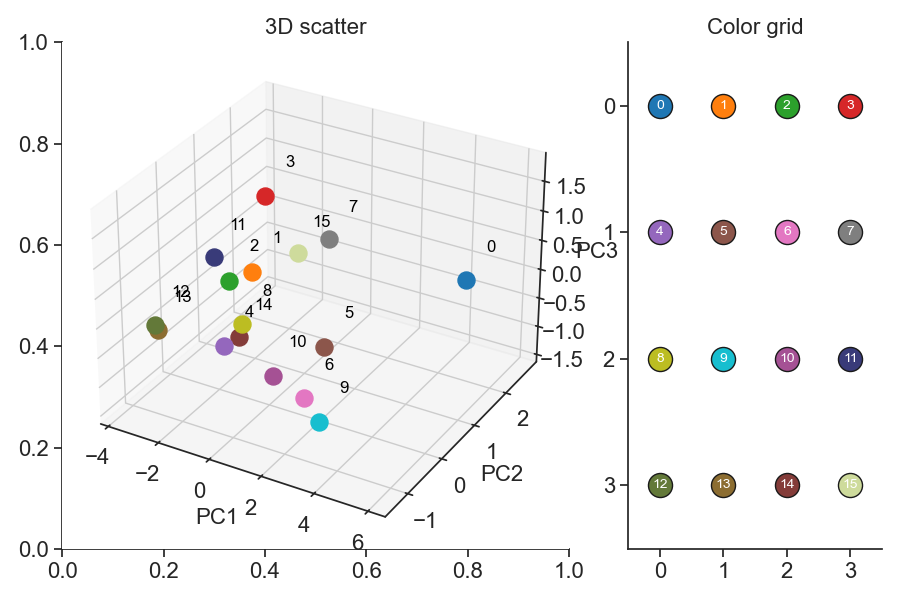

In [219]:
plt.close('all')

fig, (ax3d, ax2d) = plt.subplots(
    1, 2,
    figsize=(9, 6),              # total figure size
    gridspec_kw={'width_ratios': [2, 1]}  # left: right = 2:1
)

# Make left 3D
from mpl_toolkits.mplot3d import Axes3D
ax3d = fig.add_subplot(1, 2, 1, projection='3d')

colors16 = [
    "#1f77b4","#ff7f0e","#2ca02c","#d62728",
    "#9467bd","#8c564b","#e377c2","#7f7f7f",
    "#bcbd22","#17becf","#a55194","#393b79",
    "#637939","#8c6d31","#843c39","#cedb9c"
]

for ii in range(16):
    x, y, z = reduced_coef[ii, 0], reduced_coef[ii, 1], reduced_coef[ii, 2]
    ax3d.scatter(x, y, z, color=colors16[ii], s=150)
    ax3d.text(x+0.4, y+0.4, z+0.4, str(ii), color="black", fontsize=12, ha="center", va="center")

ax3d.set_xlabel("PC1")
ax3d.set_ylabel("PC2")
ax3d.set_zlabel("PC3")
ax3d.set_title("3D scatter")

# Right 2D grid
for ii in range(16):
    row, col = divmod(ii, 4)
    ax2d.scatter(col, -row, color=colors16[ii], s=300, edgecolor="k")
    ax2d.text(col, -row, str(ii), ha="center", va="center",
              color="white", fontsize=10)

ax2d.set_xlim(-0.5, 3.5)
ax2d.set_ylim(-3.5, 0.5)
ax2d.set_xticks(range(4))
ax2d.set_yticks([-0, -1, -2, -3])
ax2d.set_yticklabels([0, 1, 2, 3])
ax2d.set_title("Color grid")

plt.tight_layout()
plt.show()


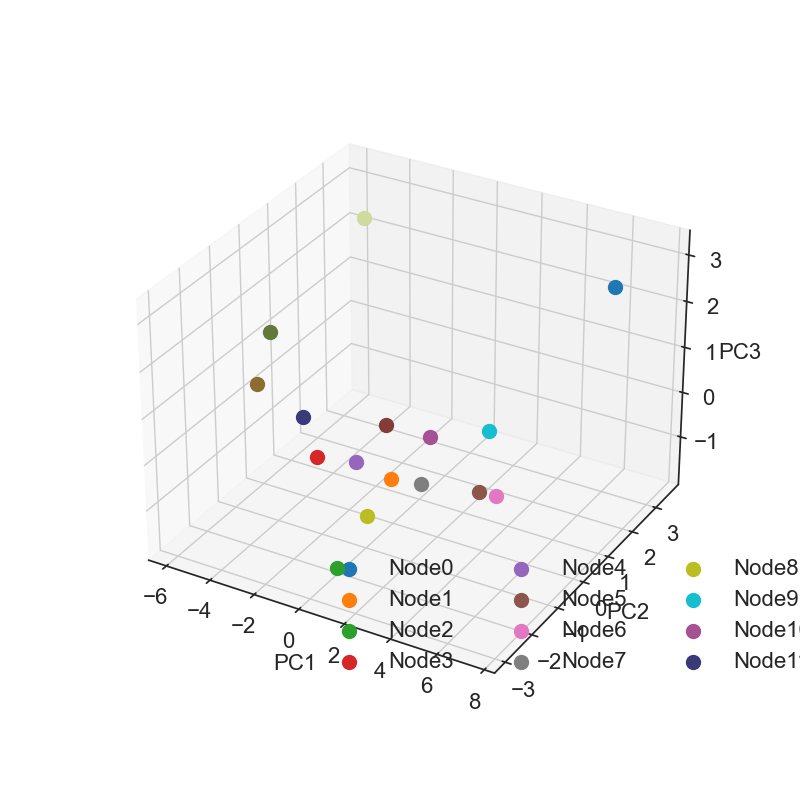

In [78]:
plt.close('all')
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')

colors16 = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # olive
    "#17becf",  # cyan
    "#a55194",  # violet
    "#393b79",  # navy
    "#637939",  # dark green
    "#8c6d31",  # dark brown
    "#843c39",  # dark red
    "#cedb9c",  # light green
]
for ii in range(16):
    ax.scatter(reduced_coef[ii,0],reduced_coef[ii,1],reduced_coef[ii,2],color=colors16[ii],s=100)

#     for tt in [0,100]:
#         ax.scatter(pop_pca[ii,tt,0],pop_pca[ii,tt,1],
#                 pop_pca[ii,tt,2],s=(tt+50)*0.5,color=colors[ii])
        
    
# ax.view_init(elev=-80, azim=150)
# ax.set_xlim(-1,3)
# ax.set_ylim(-2,2)
# ax.set_zlim(-2,2)
# ax.set_xticks([0,2])
# ax.set_yticks([-1,1])
# ax.set_zticks([-1,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# for tt in range(51,151,50):
#     ax.scatter(10,10,10,s=(tt-40)*5,color='k',label=str((tt-51)*10)+' ms')
# plt.legend(frameon=False,ncol=4,loc=(0.35,0.05))
# plt.title('Abstract State (Chosen): Delay onset 0~500ms')
# plt.savefig('PCA Chosen Subgraph Location Delay onset.png',format = 'png')

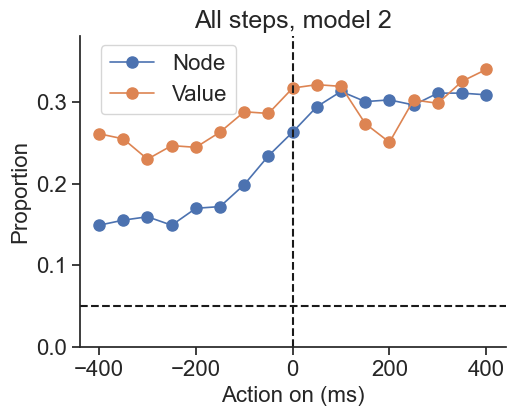

In [376]:
plt.close('all')

plt.plot(timestamps-500,proportion_node,lw=1.2,
             marker='o',ms=8,label='Node')
plt.plot(timestamps-500,proportion[:,1],lw=1.2,
             marker='o',ms=8,label='Value')

plt.axvline(0,color='k',ls='--')
plt.title('All steps, model 2',fontsize=18)
plt.ylabel('Proportion')
plt.xlabel('Action on (ms)')
plt.legend(loc=(0.05,0.75))
plt.ylim(0,0.38)
plt.axhline(0.05,color='k',ls='--')
plt.tight_layout(rect=[0,0,0.85,0.9])
plt.savefig('Regression, model 2, all steps')

(array([19., 21., 12., 16., 14., 14., 21., 25., 65., 50., 41., 35., 24.,
        25., 28., 31.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5]),
 <BarContainer object of 16 artists>)

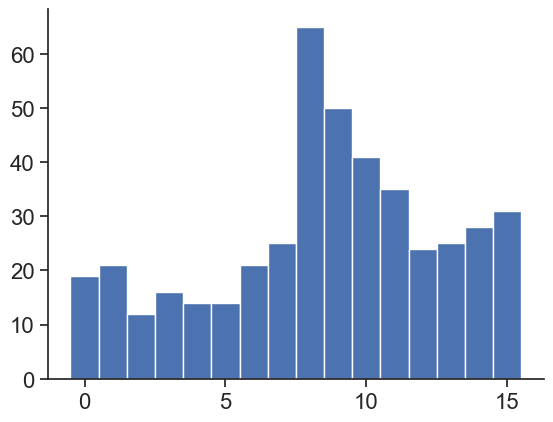

In [235]:
plt.close('all')
plt.hist(max_reg_ts,np.arange(-0.5,16))

In [273]:
neuron_df[(neuron_df.unitNumber==159) & (neuron_df.Session=='031723')][['spatial_reg','spatial']]

,spatial_reg,spatial
42,True,True


In [293]:
node_neuron = p_node[:,2]<0.05
np.sum(pval[node_neuron,2,2:]<0.05,axis=1)

array([12, 15,  9, 12,  9,  9, 11, 13, 15, 11,  7, 10, 14, 14, 11, 11,  4,
       15, 13, 15, 14,  9,  9,  4,  9,  9,  4, 14, 12, 15, 11, 14, 14,  8,
       12, 12, 12,  9,  6, 13, 14, 12, 14,  1, 14,  8, 13, 10,  7, 11, 12,
       12,  7,  7,  8, 14,  7,  9, 12,  3, 10, 15,  9, 12,  9,  5,  6,  9,
        9, 11, 10,  8,  8, 14, 15, 15, 14,  8, 14,  2,  5, 12,  8, 12, 13,
       13, 11,  3,  5,  8, 12, 12, 13, 15, 15,  3, 14, 10,  8, 14, 13,  8,
        5,  5, 11,  7,  5, 15, 12, 15,  7,  7,  3, 13, 11,  6,  5,  2, 13,
       10,  8, 12,  7,  4, 10, 10,  2,  6, 10, 14, 13])

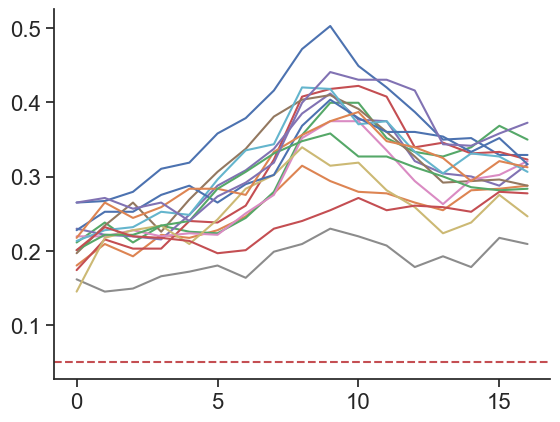

In [201]:
plt.close('all')

for ii in range(2,17):
    plt.plot(np.mean(pval[:,:,ii]<0.05,axis=0))

plt.axhline(0.05,color='r',ls='--')

In [137]:
# regression analysis with partial F-test, DON'T CHANGE THIS!!!

# regressors to build: 1) distance/value, 
#                      2) node as one hop vector, 


pval=[]
coef=[]
r2=[]
p_node=[]
p_teleport=[]
p_target=[]
proportion_node=[]
winner_node = []
winner_pval = []

timestamps = np.arange(100,950,50)

# ['031723','032823','033123','032023','040423','040723']


date = '033123'
ss = np.where(np.array(['031723','032823','033123','032023','040423','040723'])==date)[0][0]

unitNames = neuron_df.query("Session==@date").unitNumber.values
ses = choice_df.query("Session==@date")
FR = choice_spikes[ss]
one_hot_node = to_one_hot(ses['node'].values)

X = np.concatenate([ses['distance'].values.reshape(-1,1),one_hot_node], axis=1)

# idx = ses.node!=ses.target


coef_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
pval_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
p_node_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
p_teleport_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
p_target_temp = np.ones((FR.shape[2],len(timestamps)))*np.nan
proportion_node_temp = np.zeros((FR.shape[2],len(timestamps)))
r2_temp = np.ones((FR.shape[2],len(timestamps)))
winner_node_temp = np.ones((FR.shape[2],len(timestamps)))
winner_pval_temp = np.ones((FR.shape[2],len(timestamps)))


nn = np.where(unitNames==162)
        
for ii, tt in enumerate(timestamps):

    # Fit the model
    y = FR[:,tt-100:tt+100,nn].sum(axis=1).reshape(-1,1)

    # use node with maximum FR as a reference
    lambda_i = np.array([FR[ses.node.values == g].mean() 
              for g in range(16)])*1000
    ref_node = np.argmax(lambda_i)
    
    X = np.concatenate([ses['distance'].values.reshape(-1,1),np.delete(one_hot_node,ref_node,axis=1)], axis=1)
    X = add_constant(X)

    model = sm.OLS(y,X)
    res = model.fit()
    
    coef_temp[nn,ii,:] = res.params
    pval_temp[nn,ii,:] = res.pvalues
    r2_temp[nn,ii] = res.rsquared

    # _, pval_temp[nn,ii,1:], _, _ = multipletests(res.pvalues[1:], alpha=0.05, method='holm')

    # winner = winner_f_test(res, np.arange(1,17))
    # winner_node_temp[nn,ii] = winner['winner_idx']
    # winner_pval_temp[nn,ii] = winner['p_value']            
    
    cpd = partial_r2_and_f(X, X[:,np.array([0,1])], y)
    p_node_temp[nn,ii] = cpd['pval_f']

    # cpd = partial_r2_and_f(X, np.delete(X,np.array([0,15])+1,axis=1), y)
    # p_teleport_temp[nn,ii] = cpd['pval_f']

    # cpd = partial_r2_and_f(X, np.delete(X,np.array([1,7,8,14])+1,axis=1), y)
    # p_target_temp[nn,ii] = cpd['pval_f']

######## should account for multiple fav states
    

#     coef.append(coef_temp)
#     pval.append(pval_temp)
#     p_node.append(p_node_temp)
#     p_teleport.append(p_teleport_temp)
#     p_target.append(p_target_temp)
#     r2.append(r2_temp)
#     winner_node.append(winner_node_temp)
#     winner_pval.append(winner_pval_temp)
#     # proportion_node.append(proportion_current_temp)
    
# coef = np.concatenate(coef)
# pval = np.concatenate(pval)
# p_node = np.concatenate(p_node)
# p_teleport = np.concatenate(p_teleport)
# p_target = np.concatenate(p_target)
# r2 = np.concatenate(r2)
# winner_node = np.concatenate(winner_node)
# winner_pval = np.concatenate(winner_pval)

# pval=pval[:,:,np.mean(~np.isnan(pval),axis=(0,1))>0]
# proportion = np.mean(pval<0.05,axis=0)
# proportion_node = np.mean(p_node<0.05,axis=0)
# proportion_teleport = np.mean(p_teleport<0.05,axis=0)
# proportion_target = np.mean(p_target<0.05,axis=0)

Text(0.5, 1.0, 'Regression coefficient for each node')

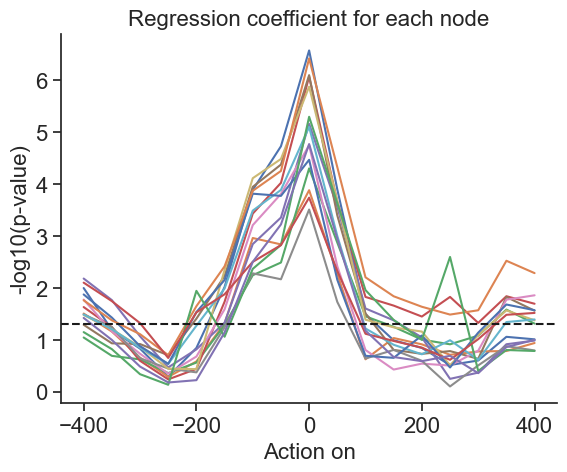

In [387]:
plt.close('all')
for ii in range(2,17):
    plt.plot(timestamps-500,-np.log10(pval[233,:,ii].ravel()))
plt.axhline(-np.log10(0.05),color='k',ls='--')
plt.ylabel('-log10(p-value)')
plt.xlabel('Action on')
plt.title('Regression coefficient for each node')

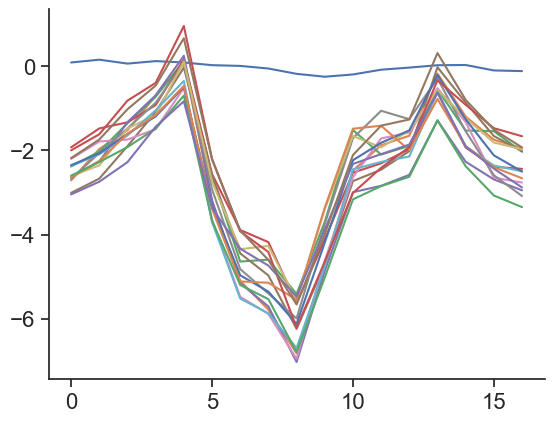

In [157]:
plt.close('all')
for ii in range(1,17):
    plt.plot(coef_temp[nn,:,ii].ravel())


In [355]:
def winner_f_test(res_full, dummy_idx):
    """
    Identify the 'winner' dummy variable (largest beta) among dummy_idx
    and test if it is significantly greater than all the others.

    Parameters
    ----------
    res_full : statsmodels regression results
        Fitted model (e.g. from sm.OLS(...).fit()).
    dummy_idx : list or array of int
        Column indices of the dummy variables in the design matrix.

    Returns
    -------
    dict with:
        'winner_idx' : int  -> column index (in design matrix) of winner
        'winner_coef': float -> coefficient of winner
        'f_stat'     : float
        'p_value'    : float
        'df_denom'   : float
        'df_num'     : float
    """
    # Identify winner
    coefs = res_full.params[dummy_idx]
    imax_local = np.argmax(coefs)
    winner_idx = dummy_idx[imax_local]

    # Build contrast matrix C
    contrasts = []
    for j in dummy_idx:
        if j != winner_idx:
            row = np.zeros(res_full.params.shape[0])
            row[winner_idx] = 1
            row[j] = -1
            contrasts.append(row)
    C = np.vstack(contrasts)

    # Perform F-test
    f_test_res = res_full.f_test(C)

    return {
        'winner_idx': winner_idx,
        'winner_coef': float(res_full.params[winner_idx]),
        'f_stat': float(f_test_res.fvalue),
        'p_value': float(f_test_res.pvalue),
        'df_num': float(f_test_res.df_num),
        'df_denom': float(f_test_res.df_denom)
    }


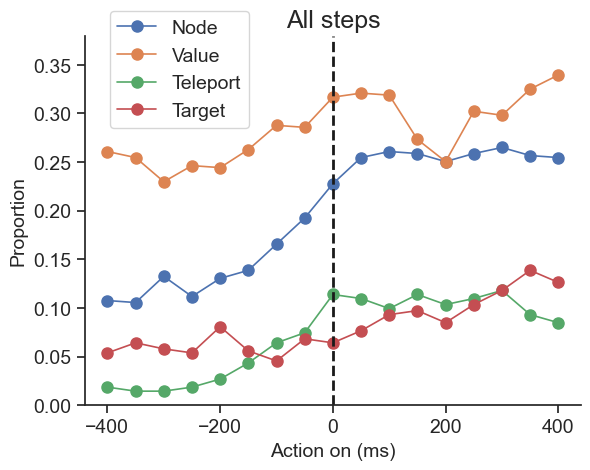

In [489]:
plt.close('all')

plt.plot(timestamps-500,proportion_node,lw=1.2,
             marker='o',ms=8,label='Node')
plt.plot(timestamps-500,proportion[:,0],lw=1.2,
             marker='o',ms=8,label='Value')

plt.plot(timestamps-500,proportion_teleport,lw=1.2,
             marker='o',ms=8,label='Teleport')

plt.plot(timestamps-500,proportion_target,lw=1.2,
             marker='o',ms=8,label='Target')

plt.axvline(0,color='k',ls='--')
plt.title('All steps',fontsize=18)
plt.ylabel('Proportion')
plt.xlabel('Action on (ms)')
plt.legend(loc=(0.05,0.75))
plt.ylim(0,0.38)
plt.savefig('Regression, model 1, all steps')

In [333]:
diff_node = np.sum(pval[:,:,2:]<0.05,axis=2)

In [ ]:
ts=np.argmax(proportion_node)

In [361]:
idx = np.where((diff_node[:,ts]<6) & (p_node[:,ts]<0.05))[0]

In [371]:
neuron_df[]

,Session,unitNumber,unitNames,channelNumbers,unitOnChannel,probe,firingRate,date,region,ap,...,MI,zscored_MI,sparsity,Lambda,Lambda_i,spatial,fav_node,spatial_MI,reg_ref_node,sig_diff_node
0,031723,97,S01_SPK099_002,99,2,4,1.258591,31723,HPC,17.4,...,"[0.4342260320815474, 0.4121338026077264, 0.409...","[-0.5126923965869727, -0.4787608637491605, -0....","[0.6283967412409144, 0.6445695318840564, 0.680...","[0.3150406409986317, 0.28455283609218895, 0.28...","[[0.30000001192092896, 0.0, 0.1351351439952850...",False,8,False,"[6.0, 6.0, 3.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[4, 3, 1, 0, 0, 0, 0, 9, 14, 15, 15, 9, 2, 11,..."
1,031723,98,S01_SPK100_001,100,1,4,5.954936,31723,HPC,17.4,...,"[0.009420720761602445, 0.016360155519969444, 0...","[-0.9314701949428208, 0.3391910911138197, 0.22...","[0.6297978190755613, 0.7623663947088916, 0.825...","[6.036585196852684, 5.955284461379051, 6.03658...","[[6.599999904632568, 5.555555820465088, 5.2702...",True,8,True,"[8.0, 8.0, 8.0, 3.0, 3.0, 3.0, 14.0, 7.0, 7.0,...","[0, 0, 0, 1, 2, 7, 7, 14, 13, 13, 12, 11, 0, 6..."
2,031723,100,S01_SPK101_002,101,2,4,2.233587,31723,HPC,17.4,...,"[0.1360203713394035, 0.17374110527881512, 0.19...","[0.15235041748268202, 0.6744195297046185, 0.74...","[0.8552652296827409, 0.8280549677333185, 0.825...","[1.067073200829327, 0.9552845731377602, 0.9247...","[[1.0, 1.1111111640930176, 1.3513513803482056,...",False,15,False,"[3.0, 3.0, 3.0, 4.0, 1.0, 1.0, 8.0, 11.0, 8.0,...","[5, 3, 3, 3, 0, 0, 0, 1, 1, 3, 3, 0, 10, 11, 1..."
3,031723,102,S01_SPK103_001,103,1,4,1.878908,31723,HPC,17.4,...,"[0.13663005803332007, 0.11296067735766593, 0.1...","[0.04232508973405336, -0.3386247224514554, -0....","[0.8556144057150936, 0.876225199485288, 0.8658...","[1.7581300344318151, 1.737804850563407, 1.7174...","[[2.700000047683716, 2.222222328186035, 2.7027...",False,13,False,"[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....","[1, 2, 2, 6, 2, 1, 1, 8, 7, 8, 4, 2, 4, 0, 2, ..."
4,031723,103,S01_SPK104_001,104,1,4,1.051078,31723,HPC,17.4,...,"[0.3512884761636854, 0.3900202950029069, 0.322...","[1.007864183010203, 2.226104201540475, 1.97874...","[0.716996428573659, 0.700459738796412, 0.72287...","[0.5589430802501738, 0.6504065240733325, 0.640...","[[0.7999999523162842, 0.5555555820465088, 0.40...",True,8,True,"[14.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0,...","[3, 4, 6, 6, 5, 11, 7, 15, 15, 15, 15, 14, 13,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,040723,163,S06_SPK189_001,189,1,6,3.042736,40723,HPC,12.1,...,"[0.03159215734918373, 0.031724951741011614, 0....","[0.08096522197879512, 0.09668826318704443, 1.2...","[0.75180526975626, 0.7997634127872219, 0.77472...","[3.0033558141440153, 2.9614095110446215, 3.053...","[[2.3728814125061035, 3.28947377204895, 2.9411...",False,7,False,"[13.0, 3.0, 5.0, 3.0, 3.0, 9.0, 7.0, 7.0, 7.0,...","[6, 2, 3, 3, 7, 4, 2, 6, 9, 0, 0, 0, 0, 6, 0, ..."
479,040723,164,S06_SPK190_001,190,1,6,1.973397,40723,HPC,12.1,...,"[0.05537684116312217, 0.07451094092155049, 0.0...","[0.5243148935351726, 1.6521799524194694, 1.438...","[0.5872505103070847, 0.4551656440672153, 0.451...","[2.5083892978727818, 2.2734899539500475, 2.072...","[[2.3728814125061035, 2.6315791606903076, 2.79...",False,12,False,"[14.0, 14.0, 14.0, 14.0, 13.0, 5.0, 5.0, 12.0,...","[14, 14, 9, 7, 4, 4, 11, 5, 10, 5, 0, 9, 1, 2,..."
480,040723,165,S06_SPK191_001,191,1,6,4.693107,40723,HPC,12.1,...,"[0.023282447731757937, 0.021098751912608654, 0...","[-0.07518543720060412, -0.2916943811508833, 0....","[0.7689404166220668, 0.6295796404193251, 0.820...","[4.92449663579464, 4.823825322091579, 4.765100...","[[4.91525411605835, 3.28947377204895, 4.852941...",False,2,False,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 13.0,...","[5, 7, 2, 6, 4, 4, 6, 1, 0, 2, 1, 1, 0, 1, 3, ..."
481,040723,166,S06_SPK192_001,192,1,6,1.514112,40723,HPC,12.1,...,"[0.08831376040210075, 0.0966768182496091, 0.07...","[-0.3976936554870922, -0.27330423813953036, -0...","[0.71364083831

(array([ 1.,  3.,  3.,  3.,  3.,  3.,  7., 10.,  8.,  9.,  7., 13., 15.,
        14., 20., 19.,  0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <BarContainer object of 17 artists>)

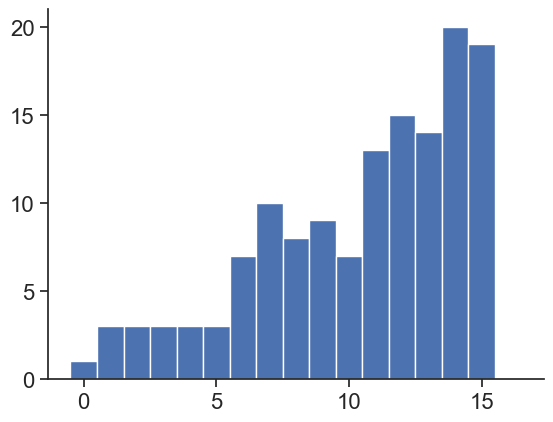

In [353]:
plt.close('all')
plt.hist(diff_node[p_node[:,ts]<0.05,ts],bins=np.arange(-0.5,17))

In [377]:
data = np.load("/Users/lianghexin/Documents/Berkeley/Teleworld/Code/MI first step node 200.npy", allow_pickle=True).item()

# Now `data` is the dict you originally saved
MI         = data["MI"]
zscored_MI = data["zscored_MI"]
sparsity   = data["sparsity"]
Lambda     = data["Lambda"]
Lambda_i   = data["Lambda_i"]
null       = data["null"]
label      = data["label"]

criterion1 = MI > np.percentile(null, 95, axis=1)
criterion2 = Lambda > 0
criterion3 = MI > 0
sig = criterion1*criterion2*criterion3

# add regression results to neuron_df

neuron_df["reg_coef"] = list(coef) 
neuron_df["reg_pval"] = list(pval)
neuron_df['spatial_pval'] = list(p_node)

ts = np.argmax(proportion[:,0])
neuron_df["distance"] = pval[:,ts,1]<0.05

# ts = np.argmax(proportion_teleport)
# neuron_df["teleport"] = p_teleport[:,ts]<0.05

# ts = np.argmax(proportion_target)
# neuron_df["target"] = p_target[:,ts]<0.05

ts = np.argmax(proportion_node)
neuron_df["spatial_reg"] = p_node[:,ts]<0.05
neuron_df["reg_ref_node"] = list(ref_node_all)

# add information measurements to neuron_df
neuron_df["MI"] = list(MI)         
neuron_df["zscored_MI"] = list(zscored_MI) 
neuron_df["sparsity"] = list(sparsity)   
neuron_df["Lambda"] = list(Lambda)     
neuron_df["Lambda_i"] = list(Lambda_i)   

ts = np.argmax(sig.mean(axis=0))
neuron_df["spatial_MI"] = sig[:,ts]
neuron_df["fav_node"] = np.argmax(Lambda_i[:,ts,:],axis=1)

neuron_df["spatial"] = neuron_df["spatial_reg"] & neuron_df["spatial_MI"]
neuron_df["sig_diff_node"] = list(np.sum(pval[:,:,2:]<0.05,axis=2))

neuron_df.to_hdf("SingleNeurons_all.h5",key='data')

/var/folders/vp/0ygvp9fj4dj79f756hg2wnwc0000gn/T/ipykernel_61404/3718453120.py:50: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['Session', 'unitNames', 'region', 'subfield', 'group', 'waveform_mean',
       'reg_coef', 'reg_pval', 'spatial_pval', 'reg_ref_node', 'MI',
       'zscored_MI', 'sparsity', 'Lambda', 'Lambda_i', 'sig_diff_node'],
      dtype='object')]

  neuron_df.to_hdf("SingleNeurons_all.h5",key='data')


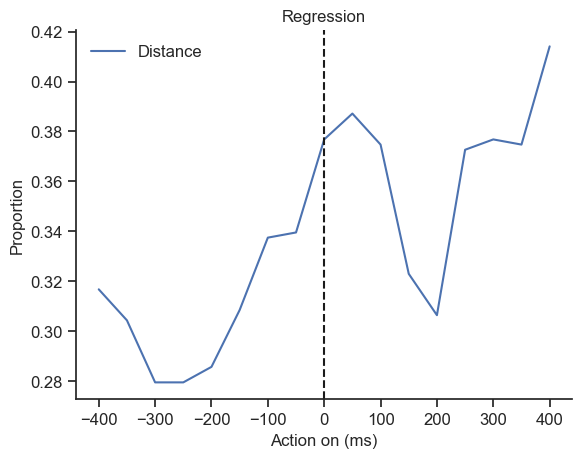

In [34]:
plt.close('all')
# plt.plot(timestamps-500,np.mean(p_node_all[1]<0.05,axis=0),label='Node')
# plt.plot(timestamps-500,np.mean(p_node_all[0]<0.05,axis=0),label='Node model 1')
# plt.plot(timestamps-500,np.mean(np.concatenate(p_action)<0.05,axis=0),label='Target')
plt.plot(timestamps-500,np.mean(pval_all[1][:,:,0]<0.05,axis=0),label='Distance')
# plt.plot(timestamps-500,np.mean(pval_all[0][:,:,0]<0.05,axis=0),label='Distance model 1')

plt.axvline(0,color='k',ls='--')
plt.title('Regression')
plt.ylabel('Proportion')
plt.xlabel('Action on (ms)')
# plt.ylim(0.03,0.35)
plt.legend(frameon=False)

In [ ]:
plt.close('all')
plt.plot(timestamps-500,np.mean(p_node_all[1]<0.05,axis=0),label='Node model 2')
# plt.plot(timestamps-500,np.mean(p_node_all[0]<0.05,axis=0),label='Node model 1')
# plt.plot(timestamps-500,np.mean(np.concatenate(p_action)<0.05,axis=0),label='Action model 2')
# plt.plot(timestamps-500,np.mean(pval_all[1][:,:,0]<0.05,axis=0),label='Distance model 2')
plt.plot(timestamps-500,np.mean(pval_all[0][:,:,0]<0.05,axis=0),label='Distance model 1')

plt.axvline(0,color='k',ls='--')
plt.title('Regression, F-test')
plt.ylabel('Proportion')
plt.xlabel('Action on (ms)')
plt.legend()

In [116]:
# Collect results

r2_all = []
pvals_all = []
timestamps = np.arange(100,950,50)

# ['031723','032823','033123','032023','040423','040723']

for ss, date in enumerate(['031723']):
    
    print(ss, date)

    ses = choice_df.query("Session == @date")
    FR = choice_spikes[ss]

    models = get_design_matrices(ses)

    for m_idx, (X, var_groups) in enumerate(models, start=1):
        
        X = X.astype(float)

        n_neurons = FR.shape[2]
        n_time = len(timestamps)

        r2 = np.zeros((n_neurons, n_time))
        pvals = np.full((n_neurons, n_time, X.shape[1]), np.nan)

        # CPD for each variable group
        cpd_results = {}
        ftest_results = {}

        for nn in tqdm(range(n_neurons), desc=f"session {date}, model {m_idx}"):
            for ii, tt in enumerate(timestamps):
                
                y = FR[:, tt-100:tt+100, nn].sum(axis=1).reshape(-1,1)
                y = scaler.fit_transform(y)

                # fit full mode and reduced model

                full = sm.OLS(y, X).fit()
        
                for varname, cols in var_groups.items():
                    
                    # CPD: drop these cols, compare RSS
                    X_reduced = np.delete(X, cols, axis=1)
                    ss_full = np.zeros((n_neurons, n_time))
                    ss_red = np.zeros((n_neurons, n_time))
        
                    fvals = np.zeros((n_neurons, n_time))
                    pvals_ftest = np.zeros((n_neurons, n_time))
                
                    k_f = X.shape[1]
                    k_r = X_reduced.shape[1]

                    red = sm.OLS(y, X_reduced).fit()
    
                    r2[nn, ii] = full.rsquared
                    pvals[nn, ii, :] = full.pvalues
                    
                    RSS_f = np.sum((y - full.fittedvalues)**2)
                    RSS_r = np.sum((y - red.fittedvalues)**2)
                    df_f = y.shape[0] - k_f
                    df_r = y.shape[0] - k_r
        
                    # CPD
                    ss_full[nn,ii] = RSS_f
                    ss_red[nn,ii] = RSS_r
        
                    # Partial F
                    F = ((RSS_r - RSS_f) / (k_f - k_r)) / (RSS_f / df_f)
                    p = 1 - f_dist.cdf(F, k_f - k_r, df_f)
        
                    fvals[nn,ii] = F
                    pvals_ftest[nn,ii] = p
        
            cpd = (ss_red - ss_full) / ss_red
            cpd_results[varname] = cpd
            ftest_results[varname] = pvals_ftest  

        # Save summary
        results.append({
            'session': date,
            'model': m_idx,
            'mean_r2': mean_r2,
            **{f'cpd_{k}': v for k,v in cpd_results.items()},
            **{f'ftest_sig_{k}': v for k,v in ftest_results.items()},
            **{f'prop_{k}': v for k,v in prop_sig.items()}
        })


0 031723


session 031723, model 1: 100%|██████████████████| 80/80 [00:39<00:00,  2.04it/s]


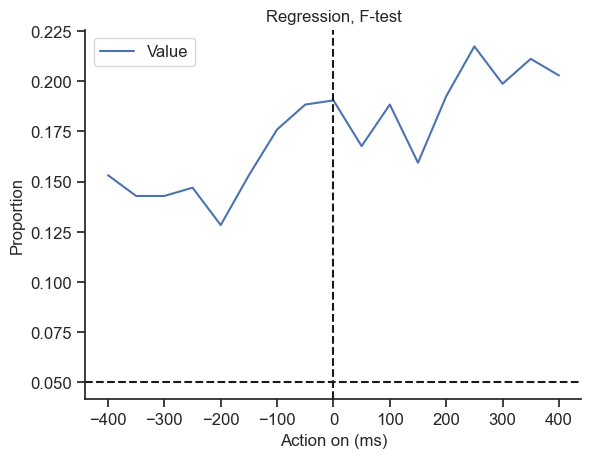

In [196]:
plt.close('all')
# plt.plot(timestamps-500,proportion_node,label='Node')
plt.plot(timestamps-500,proportion[:,1],label='Value')
plt.axhline(0.05,color='k',ls='--')
plt.axvline(0,color='k',ls='--')
plt.title('Regression, F-test')
plt.ylabel('Proportion')
plt.xlabel('Action on (ms)')
plt.legend()

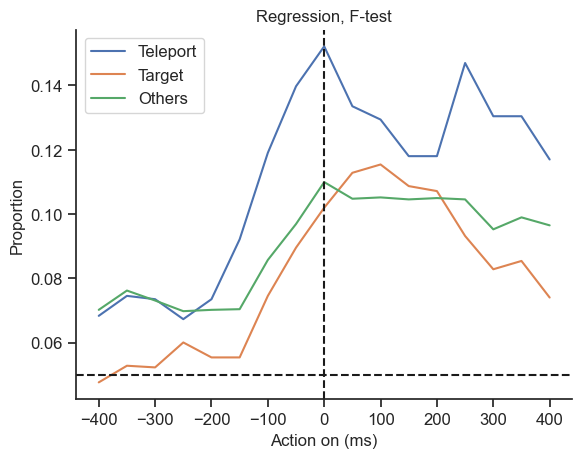

In [174]:
plt.close('all')
# plt.plot(timestamps-500,proportion_node,label='Node')
plt.plot(timestamps-500,proportion[:,1:][:,np.array([0,15])].mean(axis=1),label='Teleport')
plt.plot(timestamps-500,proportion[:,1:][:,np.array([1,7,8,14])].mean(axis=1),label='Target')
plt.plot(timestamps-500,proportion[:,1:][:,np.array([2,3,4,5,6,9,10,11,12,13])].mean(axis=1),label='Others')

plt.axvline(0,color='k',ls='--')
plt.axhline(0.05,color='k',ls='--')
plt.title('Regression, F-test')
plt.ylabel('Proportion')
plt.xlabel('Action on (ms)')
plt.legend()

In [90]:
# action, restrained the analysis on center nodes [5,6,9,10]

pval=[]
coef=[]

timestamps = np.arange(100,950,50)
scaler = StandardScaler()


for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']):

    print(ss,date)

    unitNames = neuron_df.query("Session==@date").unitNumber.values
    ses = choice_df.query("Session==@date")
    FR = choice_spikes[ss]

    one_hop_action = to_one_hot(ses['action'].values)[:,1:]
    
    idx = np.isin(ses['node'].values,[5,6,9,10])
    X = one_hop_action[idx,:4]
    FR = FR[idx,:,:]
    
    X = pd.DataFrame(X)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print('Variable with collinearity',np.sum(vif_data["VIF"].values>5))

    coef_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
    pval_temp = np.ones((FR.shape[2],len(timestamps),X.shape[1]))*np.nan
    
    for nn in tqdm(range(FR.shape[2])):
                
        for ii, tt in enumerate(timestamps):
        
            # Fit the model

            y = FR[:,tt-100:tt+100,nn].sum(axis=1).reshape(-1,1)
            scaler.fit(y)
            normed_y = scaler.transform(y)
        
            model = sm.OLS(normed_y,X)
            res = model.fit()
            
            coef_temp[nn,ii,:] = res.params
            pval_temp[nn,ii,:] = res.pvalues
    

    coef.append(coef_temp)
    pval.append(pval_temp)

coef = np.concatenate(coef)
pval = np.concatenate(pval)

pval=pval[:,:,np.mean(~np.isnan(pval),axis=(0,1))>0]
proportion = np.mean(pval<0.05,axis=0)

0 031723
Variable with collinearity 0


100%|███████████████████████████████████████████| 80/80 [00:01<00:00, 72.45it/s]


1 032823
Variable with collinearity 0


100%|███████████████████████████████████████████| 94/94 [00:01<00:00, 61.02it/s]


2 033123
Variable with collinearity 0


100%|███████████████████████████████████████████| 88/88 [00:02<00:00, 42.36it/s]


3 032023
Variable with collinearity 0


100%|███████████████████████████████████████████| 73/73 [00:01<00:00, 46.66it/s]


4 040423
Variable with collinearity 0


100%|███████████████████████████████████████████| 88/88 [00:01<00:00, 60.36it/s]


5 040723
Variable with collinearity 0


100%|███████████████████████████████████████████| 60/60 [00:00<00:00, 60.60it/s]


In [69]:
sz1 = 14
sz2 = 20
sns.set(style="ticks", rc={"lines.linewidth": 2})
matplotlib.rc('xtick', labelsize=sz1) 
matplotlib.rc('ytick', labelsize=sz1) 
matplotlib.rc('axes', labelsize=sz1)  
matplotlib.rc('axes', titlesize=sz1)  
matplotlib.rc('figure', titlesize=sz2)
matplotlib.rc('legend', fontsize=sz1) 
matplotlib.rc('legend', title_fontsize=sz1)
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

0 031723


80it [00:24,  3.26it/s]


1 032823


94it [00:25,  3.66it/s]


2 033123


88it [00:23,  3.69it/s]


3 032023


73it [00:19,  3.70it/s]


4 040423


88it [00:23,  3.77it/s]


5 040723


60it [00:17,  3.49it/s]


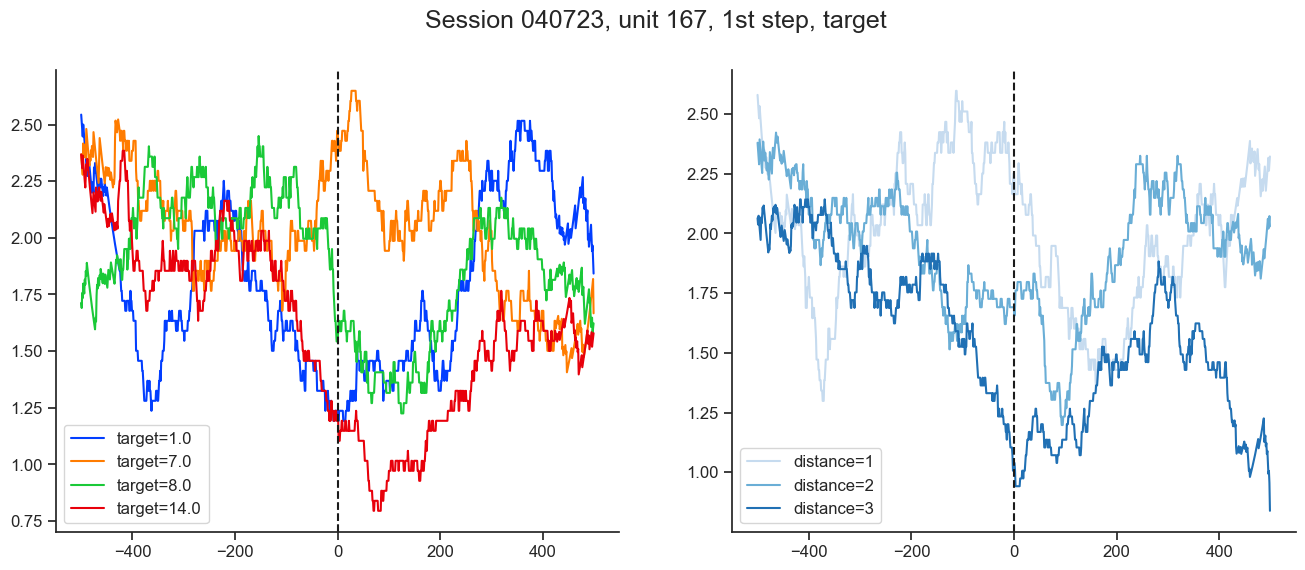

In [208]:
# for each neuron, look at tuning to node, action, distance

# ['031723','032823','033123','032023','040423','040723']

for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']): 

    print(ss,date)
    
    unitNames = neuron_df.query("Session==@date").unitNumber.values
    ses = choice_df.query("Session==@date")
    FR = choice_spikes[ss]

    
    for nn, unitNumber in tqdm(enumerate(unitNames)):

        plt.close('all')
        
        fig, axes = plt.subplots(1,2,figsize=(16,6))

        plot_psth(FR[:,:,nn], ses, 'target', axes[0])
        axes[0].legend()

        idx = (ses.distance.values>-1) & (ses.distance.values<4)
        plot_psth(FR[idx,:,nn], ses.iloc[idx,:], 'distance', axes[1])
        axes[1].legend()
            
        plt.suptitle("Session %s, unit %i, 1st step, target" % (date,unitNumber))
        plt.savefig("Session %s, unit %i, 1st step, target" % (date,unitNumber))


0 031723


80it [00:38,  2.08it/s]


1 032823


94it [00:58,  1.60it/s]


2 033123


88it [00:47,  1.85it/s]


3 032023


73it [00:39,  1.87it/s]


4 040423


88it [00:59,  1.48it/s]


5 040723


60it [00:25,  2.37it/s]


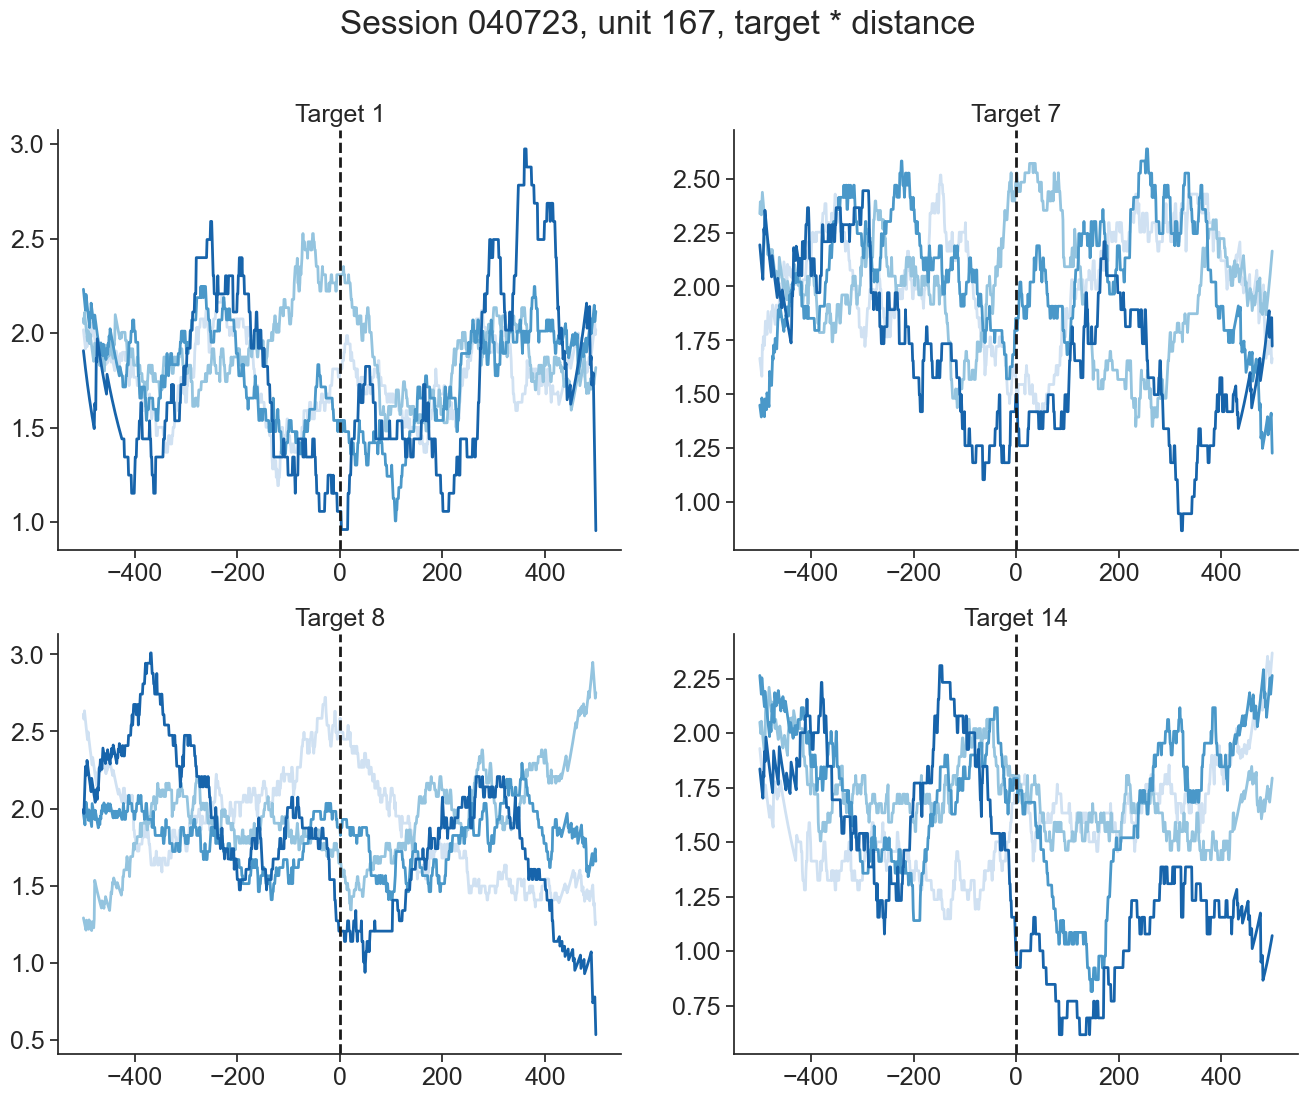

In [54]:
# for each neuron, look at distance * target conjunction

# ['031723','032823','033123','032023','040423','040723']

for ss, date in enumerate(['031723','032823','033123','032023','040423','040723']): 

    print(ss,date)
    
    unitNames = neuron_df.query("Session==@date").unitNumber.values
    ses = choice_df.query("Session==@date")
    FR = choice_spikes[ss]
    
    
    for nn, unitNumber in tqdm(enumerate(unitNames)):

        plt.close('all')
        
        fig, axes = plt.subplots(2,2,figsize=(16,12))

        for ii, target in enumerate([1,7,8,14]):

            idx = (ses.distance.values>-1) & (ses.distance.values<4) & (ses.target==target)
            plot_psth(FR[idx,:,nn], ses.loc[idx,:], 'distance', axes[np.divmod(ii,2)])
            axes[np.divmod(ii,2)].set_title("Target %i" % target)
            # axes[np.divmod(ii)].legend(loc=(0.5,-0.6))

            
        plt.suptitle("Session %s, unit %i, target * distance" % (date,unitNumber))
        plt.savefig("Session %s, unit %i, target and distance" % (date,unitNumber))


In [202]:
def plot_psth(spikes, df, condition, ax):

    uni_values = np.sort(df[condition].unique())
    t = np.arange(-500, 500)
    
    if condition=='distance':
        colors = sns.color_palette('Blues',len(uni_values))
    if condition=='action':
        colors = sns.color_palette("bright", len(uni_values)) 
    if condition=='target':
        colors = sns.color_palette("bright", len(uni_values)) 
        
    for ii, vv in enumerate(uni_values):
        
        idx = df[condition].values == vv
        trace = movmean(spikes[idx, :].mean(axis=0)*1000, w=75).flatten()
        
        if condition=='node':
            x,y=xy(vv,4,4)
            ax.plot(t, trace,color=cmap_2d[x,y],label = condition + '=' + str(vv))
        else:
            ax.plot(t, trace,color=colors[ii],label = condition + '=' + str(vv))
        
    ax.axvline(0, color='k', linestyle='--')


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[["X1", "X2", "X3"]]  # predictors
y = df["y"]

# scale predictors (important for LASSO)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cross-validated LASSO
lasso = LassoCV(cv=5, random_state=0).fit(X_scaled, y)

print("Optimal alpha (penalty):", lasso.alpha_)
print("Coefficients:", dict(zip(X.columns, lasso.coef_)))

# keep predictors with non-zero coefficients
selected_predictors = [col for col, coef in zip(X.columns, lasso.coef_) if coef != 0]
print("Selected predictors:", selected_predictors)


(array([ 4.,  5.,  3.,  4.,  5.,  3.,  2., 34., 14.,  3.,  3.,  4.,  2.,
         4., 28.,  5.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5]),
 <BarContainer object of 16 artists>)

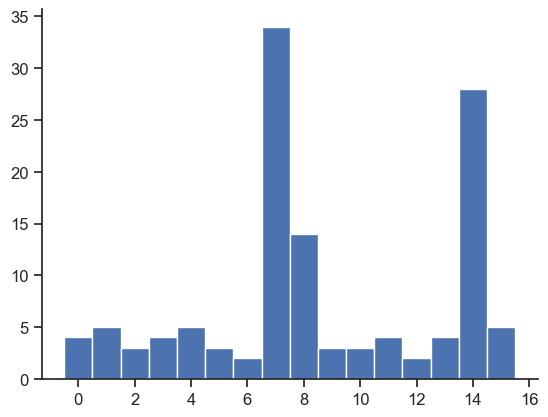

In [158]:
idx = (pval[:,9,-3]>0.05) & (sig[:,9])
fav_node = np.argmax(Lambda_i[idx,9,:],axis=1)
plt.hist(fav_node,bins=np.arange(-0.5,16))

In [269]:
sz1 = 12
sz2 = 18
sns.set(style="ticks", rc={"lines.linewidth": 1.5})
matplotlib.rc('xtick', labelsize=sz1) 
matplotlib.rc('ytick', labelsize=sz1) 
matplotlib.rc('axes', labelsize=sz1)  
matplotlib.rc('axes', titlesize=sz1)  
matplotlib.rc('figure', titlesize=sz2)
matplotlib.rc('legend', fontsize=sz1) 
matplotlib.rc('legend', title_fontsize=sz1)
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

In [287]:
neuron_df

,Session,unitNumber,unitNames,channelNumbers,unitOnChannel,probe,firingRate,date,region,ap,...,target_tuning,distance_tuning,MI,zscored_MI,sparsity,Lambda,Lambda_i,node_tuning,node_tuning_reg,fav_node
0,031723,97,S01_SPK099_002,99,2,4,1.258591,31723,HPC,17.4,...,False,False,"[0.4342260320815474, 0.4121338026077264, 0.409...","[-0.5126923965869727, -0.4787608637491605, -0....","[0.6283967412409144, 0.6445695318840564, 0.680...","[0.3150406409986317, 0.28455283609218895, 0.28...","[[0.30000001192092896, 0.0, 0.1351351439952850...",False,True,8
1,031723,98,S01_SPK100_001,100,1,4,5.954936,31723,HPC,17.4,...,False,False,"[0.009420720761602445, 0.016360155519969444, 0...","[-0.9314701949428208, 0.3391910911138197, 0.22...","[0.6297978190755613, 0.7623663947088916, 0.825...","[6.036585196852684, 5.955284461379051, 6.03658...","[[6.599999904632568, 5.555555820465088, 5.2702...",True,True,8
2,031723,100,S01_SPK101_002,101,2,4,2.233587,31723,HPC,17.4,...,False,False,"[0.1360203713394035, 0.17374110527881512, 0.19...","[0.15235041748268202, 0.6744195297046185, 0.74...","[0.8552652296827409, 0.8280549677333185, 0.825...","[1.067073200829327, 0.9552845731377602, 0.9247...","[[1.0, 1.1111111640930176, 1.3513513803482056,...",False,True,15
3,031723,102,S01_SPK103_001,103,1,4,1.878908,31723,HPC,17.4,...,False,False,"[0.13663005803332007, 0.11296067735766593, 0.1...","[0.04232508973405336, -0.3386247224514554, -0....","[0.8556144057150936, 0.876225199485288, 0.8658...","[1.7581300344318151, 1.737804850563407, 1.7174...","[[2.700000047683716, 2.222222328186035, 2.7027...",False,False,13
4,031723,103,S01_SPK104_001,104,1,4,1.051078,31723,HPC,17.4,...,False,False,"[0.3512884761636854, 0.3900202950029069, 0.322...","[1.007864183010203, 2.226104201540475, 1.97874...","[0.716996428573659, 0.700459738796412, 0.72287...","[0.5589430802501738, 0.6504065240733325, 0.640...","[[0.7999999523162842, 0.5555555820465088, 0.40...",True,True,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,040723,163,S06_SPK189_001,189,1,6,3.042736,40723,HPC,12.1,...,False,False,"[0.03159215734918373, 0.031724951741011614, 0....","[0.08096522197879512, 0.09668826318704443, 1.2...","[0.75180526975626, 0.7997634127872219, 0.77472...","[3.0033558141440153, 2.9614095110446215, 3.053...","[[2.3728814125061035, 3.28947377204895, 2.9411...",False,False,7
479,040723,164,S06_SPK190_001,190,1,6,1.973397,40723,HPC,12.1,...,False,False,"[0.05537684116312217, 0.07451094092155049, 0.0...","[0.5243148935351726, 1.6521799524194694, 1.438...","[0.5872505103070847, 0.4551656440672153, 0.451...","[2.5083892978727818, 2.2734899539500475, 2.072...","[[2.3728814125061035, 2.6315791606903076, 2.79...",False,False,12
480,040723,165,S06_SPK191_001,191,1,6,4.693107,40723,HPC,12.1,...,False,False,"[0.023282447731757937, 0.021098751912608654, 0...","[-0.07518543720060412, -0.2916943811508833, 0....","[0.7689404166220668, 0.6295796404193251, 0.820...","[4.92449663579464, 4.823825322091579, 4.765100...","[[4.91525411605835, 3.28947377204895, 4.852941...",False,False,2
481,040723,166,S06_SPK192_001,192,1,6,1.514112,40723,HPC,12.1,...,False,False,"[0.08831376040210075, 0.0966768182496091, 0.07...","[-0.3976936554870922, -0.27330423813953036, -0...","[0.7136408383123732, 0.6267808223938092, 0.707...","[1.778523437678814, 1.803691266104579, 1.74496...","[[2.542372703552246, 0.9210526347160339, 1.470...",False,False,15


Text(0.5, 0, 'Node with maximum FR')

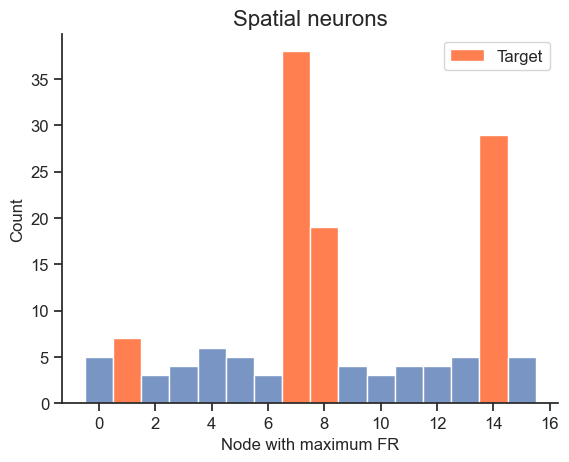

In [289]:
from matplotlib.patches import Patch

plt.close('all')

ax = sns.histplot(data=neuron_df[neuron_df.node_tuning],x='fav_node',bins=np.arange(-0.5,16,1))

# Target nodes to highlight
highlight = [1, 7, 8, 14]

# Paint specific bars coral
for patch in ax.patches:
    # Compute center of bar
    center = patch.get_x() + patch.get_width()/2
    if center in highlight:
        patch.set_facecolor("coral")

legend_elements = [
    Patch(facecolor='coral', label='Target'),
]

plt.legend(handles=legend_elements)
plt.title('Spatial neurons',fontsize=16)
plt.xlabel('Node with maximum FR')

In [ ]:
look at their target-dependent activation probability 

In [ ]:
this analysis was restrained at the first step, 
do these neurons fire because the target appears at the first step or not?

in other way, are they 'reward anticipating' or 'memory of target'?



In [144]:
sig_node = p_node[:,5]<0.05
sig_target = pval[:,7,-2]<0.05

Text(0.5, 0.98, 'Node and target from all steps')

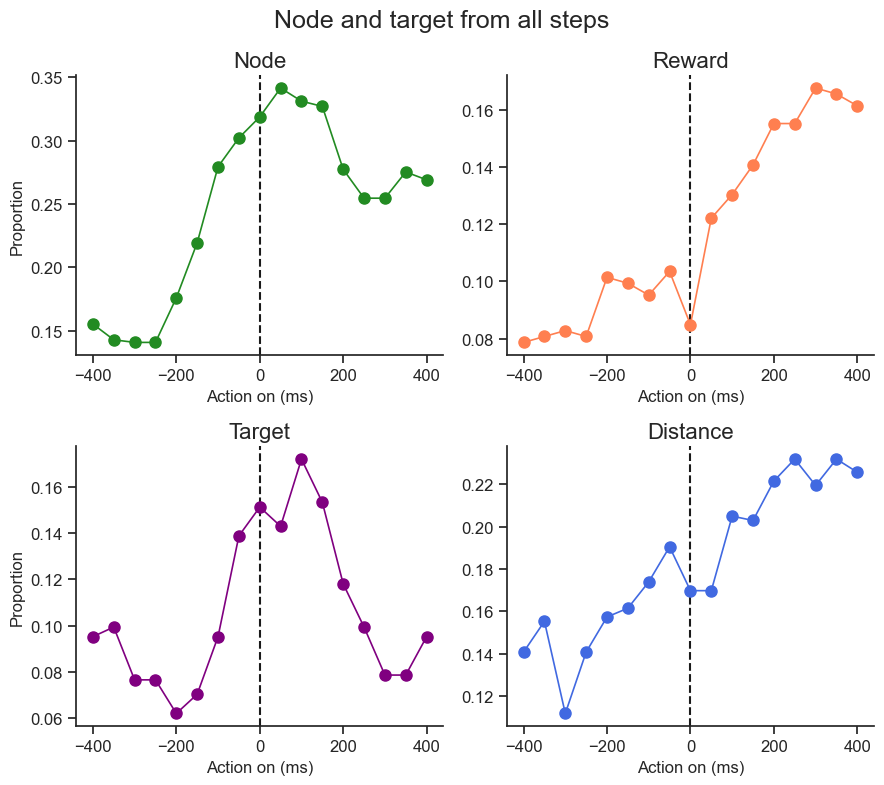

In [164]:
fig, axes = plt.subplots(2, 2, figsize=(9, 8))  # 2x2 grid
axes = axes.flatten()  # make it easier to index

legends = ['Node', 'Reward', 'Target', 'Distance']
colors = ['forestgreen', 'coral','purple', 'royalblue']

# Your data
data_list = [proportion_node, proportion[:, -3], proportion[:, -2], proportion[:, -1]]

for ii in range(4):  
    ax = axes[ii]
    ax.plot(
        timestamps - 500,
        data_list[ii],
        color=colors[ii],
        lw=1.2,
        marker='o',
        ms=8,
        label=legends[ii],
        zorder=2
    )
    ax.set_title(legends[ii], fontsize=16)
    ax.axvline(0, color='k', ls='--', zorder=1)
    ax.set_xlabel("Action on (ms)")

# Y-label only on the first subplot
axes[0].set_ylabel("Proportion")
axes[2].set_ylabel("Proportion")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Node and target from all steps')
# plt.savefig('regression model 3')


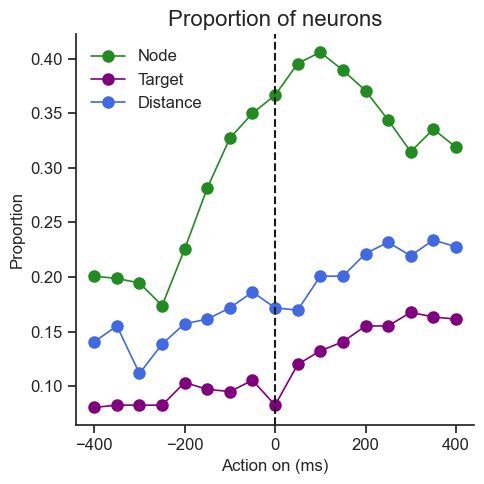

In [60]:
plt.close('all')
plt.figure(figsize=(5,5))

legends = ['Node', 'Target', 'Distance']
colors = ['forestgreen', 'purple', 'royalblue']

# Your three signals
data_list = [proportion_node, proportion[:, -2], proportion[:, -1]]

for ii in range(3):
    plt.plot(
        timestamps - 500,
        data_list[ii],
        color=colors[ii],
        lw=1.2,
        marker='o',
        ms=8,
        label=legends[ii],
        zorder=2
    )

plt.legend(frameon=False)
plt.xlabel("Action on (ms)")
plt.ylabel("Proportion")
plt.title("Proportion of neurons",zorder=1,fontsize=16)
plt.axvline(0,color='k',ls='--')
plt.tight_layout()
plt.show()
